# Plot some categories from the Steam Hardware Survey dataset

In [1]:
from datetime import datetime
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from pandas.api.types import CategoricalDtype

%config InlineBackend.figure_format = 'retina'

In [39]:
df = pd.read_parquet("steam_hw_survey.parquet")
df.dtypes
df["category"] = df["category"].astype("category")
df["platform"] = df["platform"].astype("category")
df

,index,perc,category,date,platform
0,Unspecified,10.77,Network Speed,2004-10-01,pc
1,14.4 Kbps,0.10,Network Speed,2004-10-01,pc
2,28.8 Kbps,0.16,Network Speed,2004-10-01,pc
3,33.6 Kbps,0.10,Network Speed,2004-10-01,pc
4,56.0 Kbps,2.38,Network Speed,2004-10-01,pc
...,...,...,...,...,...
334672,AVX512VNNI,11.30,Other Settings,2024-12-01,linux
334673,AVX512ER,0.00,Other Settings,2024-12-01,linux
334674,PrefetchW,0.00,Other Settings,2024-12-01,linux
334675,NTFS,0.00,Other Settings,2024-12-01,linux


List categories throughout the years, some may be specific to a platform, and others are only available for some months or years.

In [3]:
df["category"].cat.categories

Index(['16:9 Aspect Primary Displays', '4:3 Aspect Primary Displays',
       'AGP GART Settings', 'AMD CPU Speeds', 'ATI Drivers', 'Audio Devices',
       'Bus Types', 'CPU', 'Cards which default to DirectX 7 Path on Source',
       'Cards which default to DirectX 8 Path on Source',
       'Cards which default to DirectX 9 Shader Model 2 Path on Source',
       'Cards which default to DirectX 9 Shader Model 3 Path on Source',
       'Desktop Bit Depth', 'DirectX 10 GPUs', 'DirectX 10 Systems',
       'DirectX 10.x GPUs', 'DirectX 10.x Systems', 'DirectX 11 GPUs',
       'DirectX 11 Systems', 'DirectX 12 GPUs', 'DirectX 12 Systems',
       'DirectX 9 Shader Model 2.0 GPUs',
       'DirectX 9 Shader Model 2b and 3.0 GPUs', 'Drive Type', 'DriveType',
       'Free Hard Drive Space', 'Game Renderer', 'Game Screen Depth',
       'Game Screen Width', 'Intel CPU Speeds', 'Language', 'Linux Version',
       'MSAA - Percent of cards which support each MSAA level',
       'MSAA Support Level', 'M

In [4]:
df.shape

(334677, 5)

## Share of Operating Systems

In [7]:
df_os_version = df.loc[(df["category"] == "OS Version (total)") & (df["perc"] > 1)].copy()
df_os_version["year"] = df_os_version["date"].dt.year.astype(str)
df_os_version

,index,perc,category,date,platform,year
33850,Windows,94.93,OS Version (total),2014-02-01,combined,2014
33851,OSX,3.47,OS Version (total),2014-02-01,combined,2014
34171,Windows,95.17,OS Version (total),2014-03-01,combined,2014
34172,OSX,3.42,OS Version (total),2014-03-01,combined,2014
34173,Linux,1.30,OS Version (total),2014-03-01,combined,2014
...,...,...,...,...,...,...
76568,OSX,1.39,OS Version (total),2024-11-01,combined,2024
76569,Linux,2.00,OS Version (total),2024-11-01,combined,2024
76915,Windows,96.56,OS Version (total),2024-12-01,combined,2024
76916,OSX,1.41,OS Version (total),2024-12-01,combined,2024


In [8]:
df_os_version = (
    df_os_version
    .groupby(["year", "index"])
    .mean()
    .reset_index()
)
df_os_version.head(5)

,year,index,perc
0,2014,Linux,1.164000
1,2014,OSX,3.408182
2,2014,Windows,95.279091
3,2015,Linux,1.082500
4,2015,OSX,3.321667


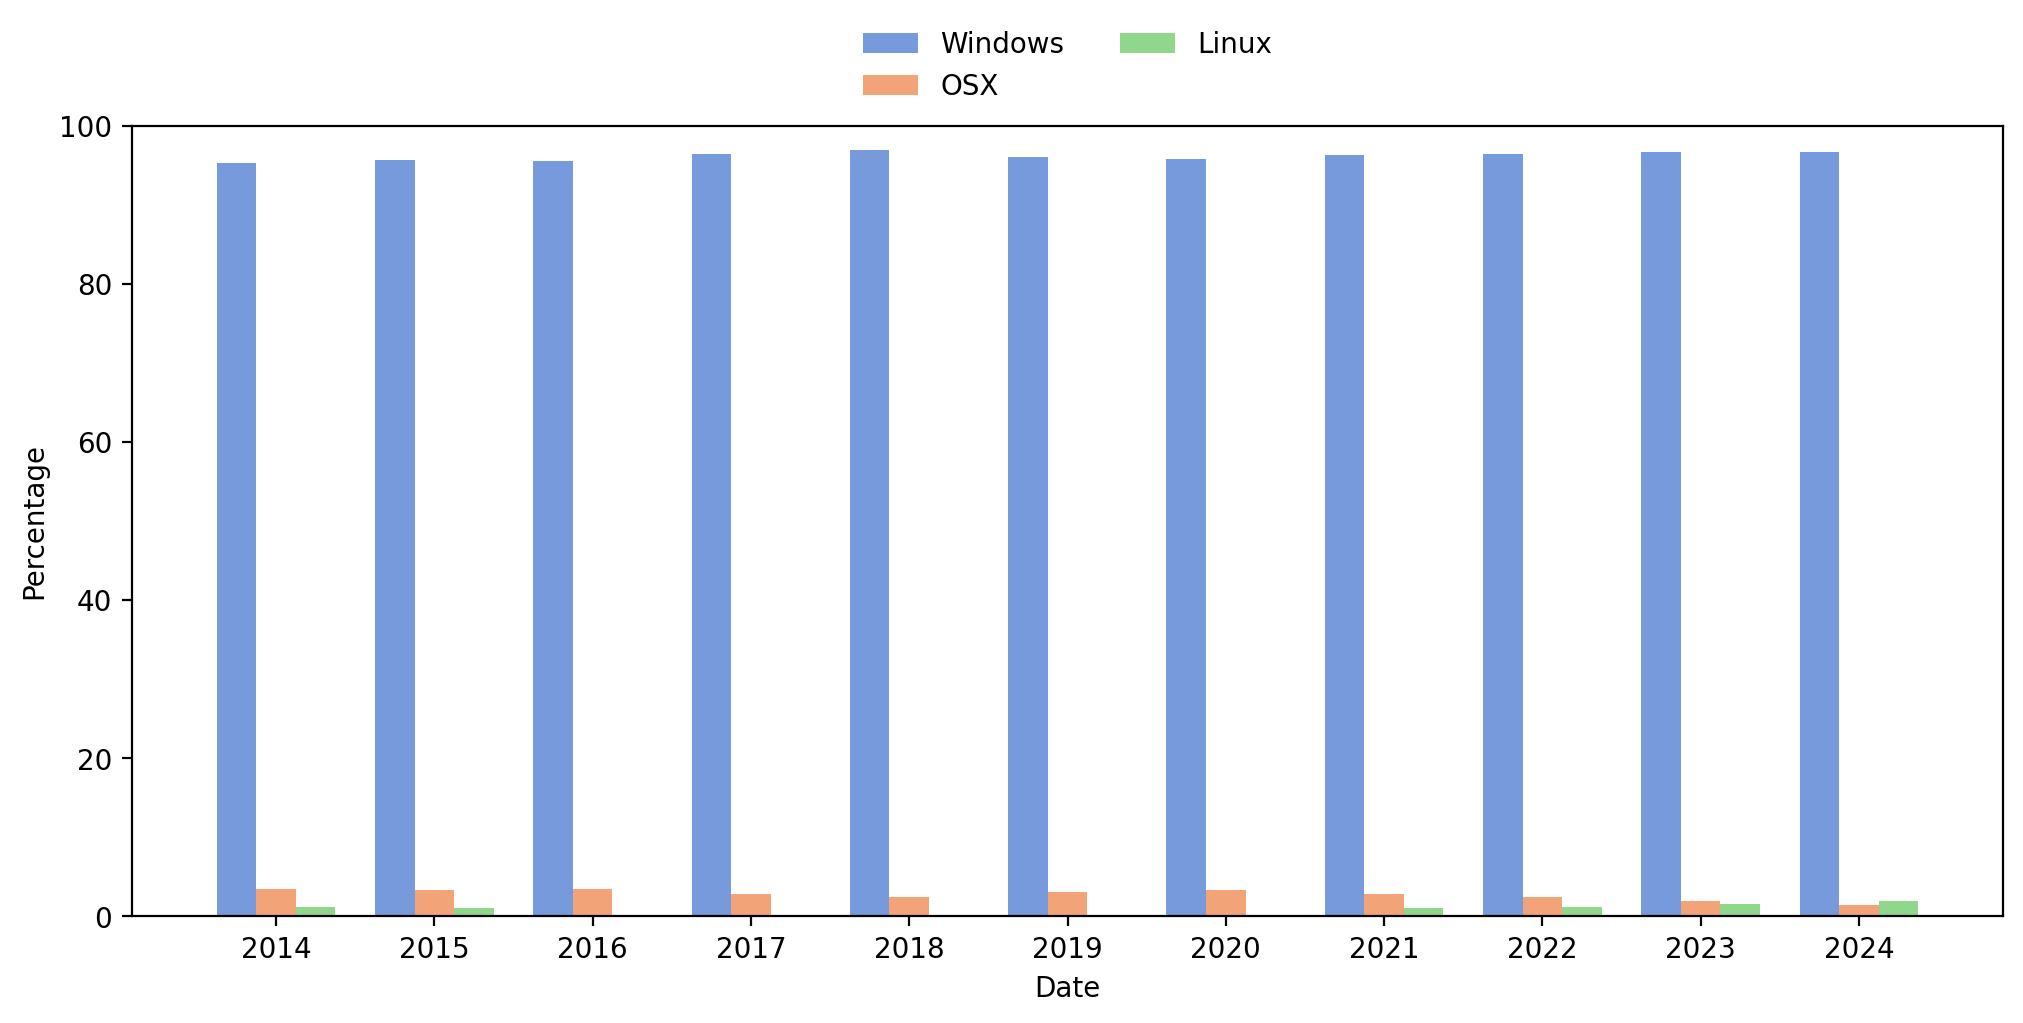

In [9]:
_, ax = plt.subplots(nrows=1, figsize=(10, 5), constrained_layout=True)
ax.set(xlabel="Date", ylabel="Percentage", ylim=[0, 100])
sns.histplot(
    df_os_version,
    x="year",
    hue="index",
    weights="perc",
    multiple="dodge",
    discrete=True,
    hue_order=["Windows", "OSX", "Linux"], 
    palette="muted",
    shrink=0.75,
    linewidth=0.0,
    ax=ax,
)
sns.move_legend(
    ax, "lower center", bbox_to_anchor=(0.5, 1), ncol=2, title=None, frameon=False
)

The bar chart depicts the distribution of operating systems (OS) of Steam users among years from 2014 to 2024. The findings also clearly show that Windows has continued to show a clear and absolute command of the user base of Steam for the past 10 years. Windows almost exclusively dominates the platform market with a tiny fluctuation from one year to another. On the other hand, both macOS (OSX) and Linux have kept very low adoption percentages over the same period. Though this is sometimes a matter of variation, Linux is the OS with least steam on Steam and OSX has a minimal share of the market. This ongoing trend implies that, although some other OSes such as Linux or OSX have gradually spread within other domains, there has been little spread in the gaming community on Steam. These results underscore the continued relevance of Windows as the major OS used for gaming, due to its position in the gaming market and overall computing market


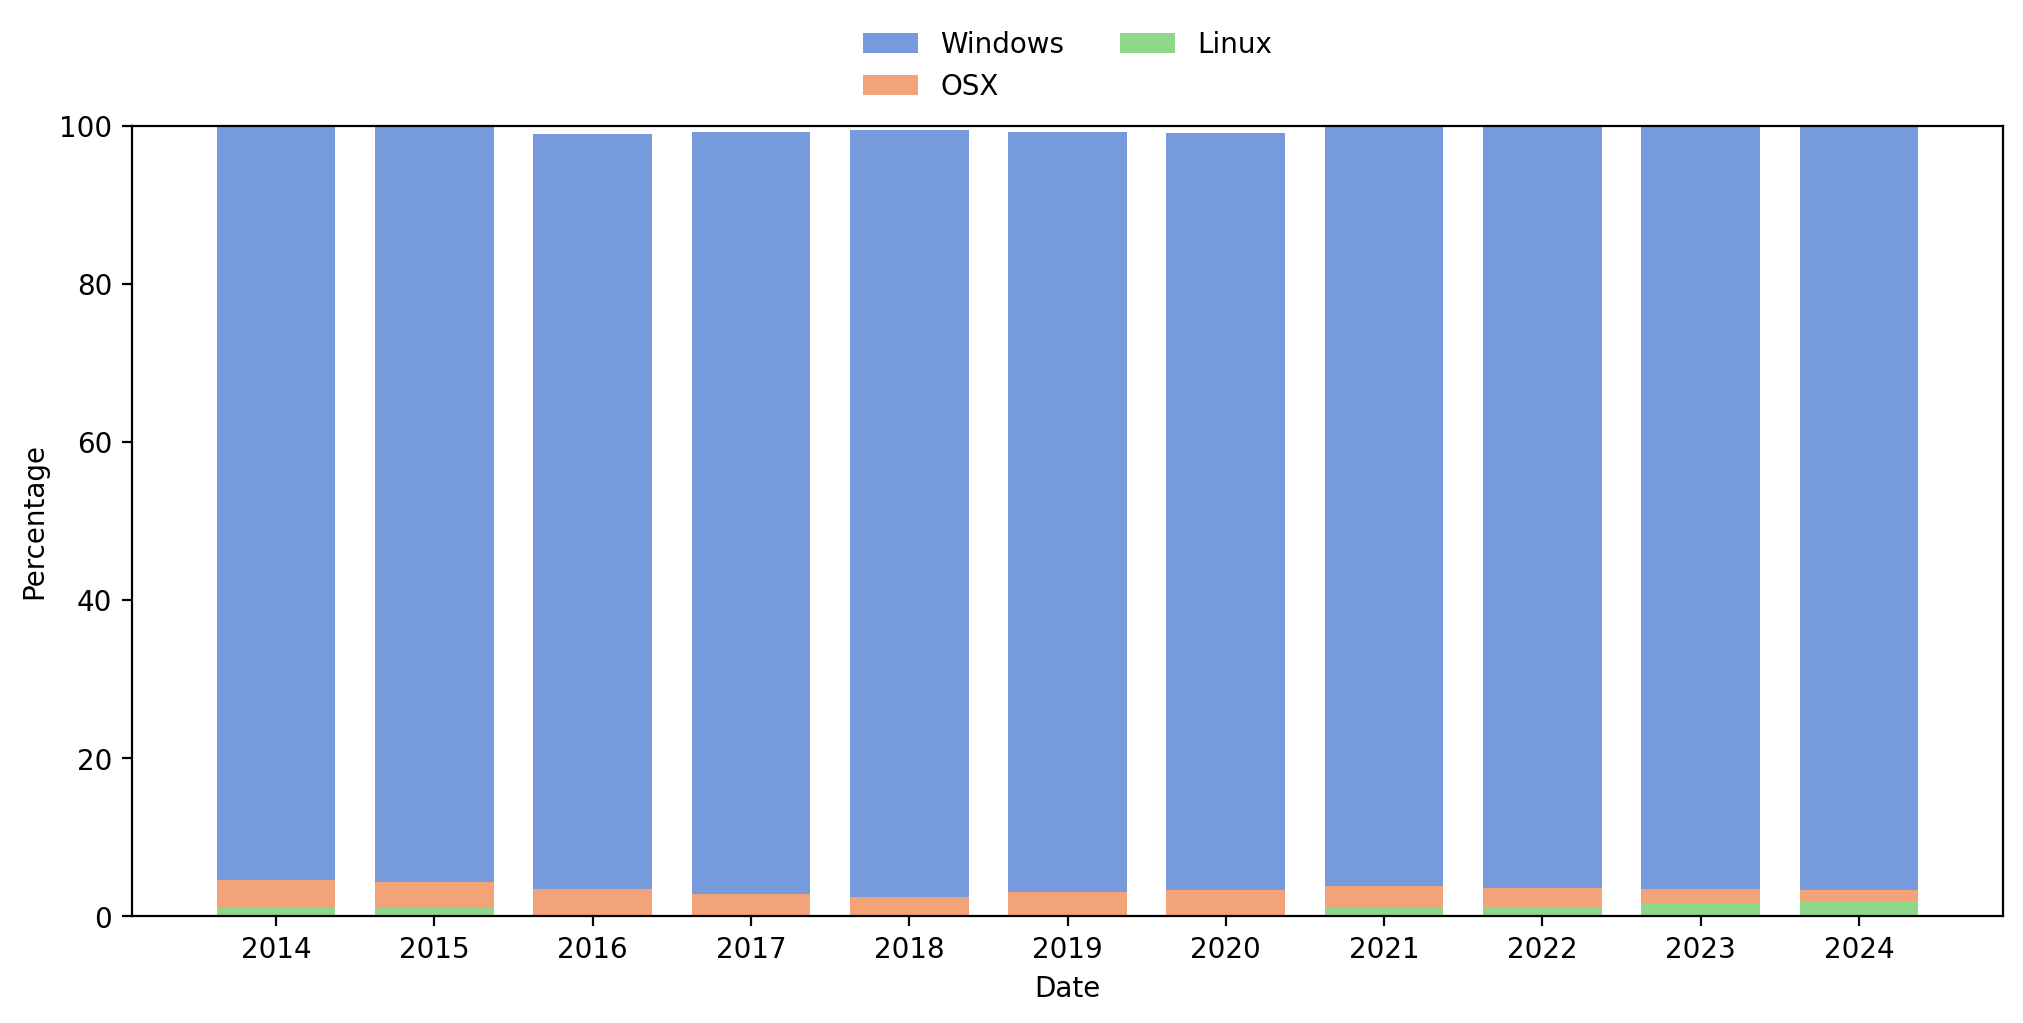

In [10]:
_, ax = plt.subplots(nrows=1, figsize=(10, 5), constrained_layout=True)
ax.set(xlabel="Date", ylabel="Percentage", ylim=[0, 100])
sns.histplot(
    df_os_version,
    x="year",
    hue="index",
    weights="perc",
    multiple="stack",
    discrete=True,
    hue_order=["Windows", "OSX", "Linux"],
    palette="muted",
    shrink=0.75,
    linewidth=0.0,
    ax=ax,
)
sns.move_legend(
    ax, "lower center", bbox_to_anchor=(0.5, 1), ncol=2, title=None, frameon=False
)

## Share of Windows Versions

In [11]:
df_windows_version = df.loc[(df["category"] == "OS Version") & (df["perc"] > 1) & df["index"].str.contains("Windows", case=False)].copy()
df_windows_version["year"] = df_windows_version["date"].dt.year.astype(str)
df_windows_version

,index,perc,category,date,platform,year
20975,Windows XP 32 bit,33.80,OS Version,2010-06-01,combined,2010
20976,Windows 7 64 bit,24.39,OS Version,2010-06-01,combined,2010
20977,Windows Vista 32 bit,14.55,OS Version,2010-06-01,combined,2010
20978,Windows 7,11.46,OS Version,2010-06-01,combined,2010
20979,Windows Vista 64 bit,6.59,OS Version,2010-06-01,combined,2010
...,...,...,...,...,...,...
76213,Windows 11 64 bit,47.69,OS Version,2024-10-01,combined,2024
76553,Windows 11 64 bit,48.80,OS Version,2024-11-01,combined,2024
76554,Windows 10 64 bit,47.46,OS Version,2024-11-01,combined,2024
76900,Windows 11 64 bit,52.98,OS Version,2024-12-01,combined,2024


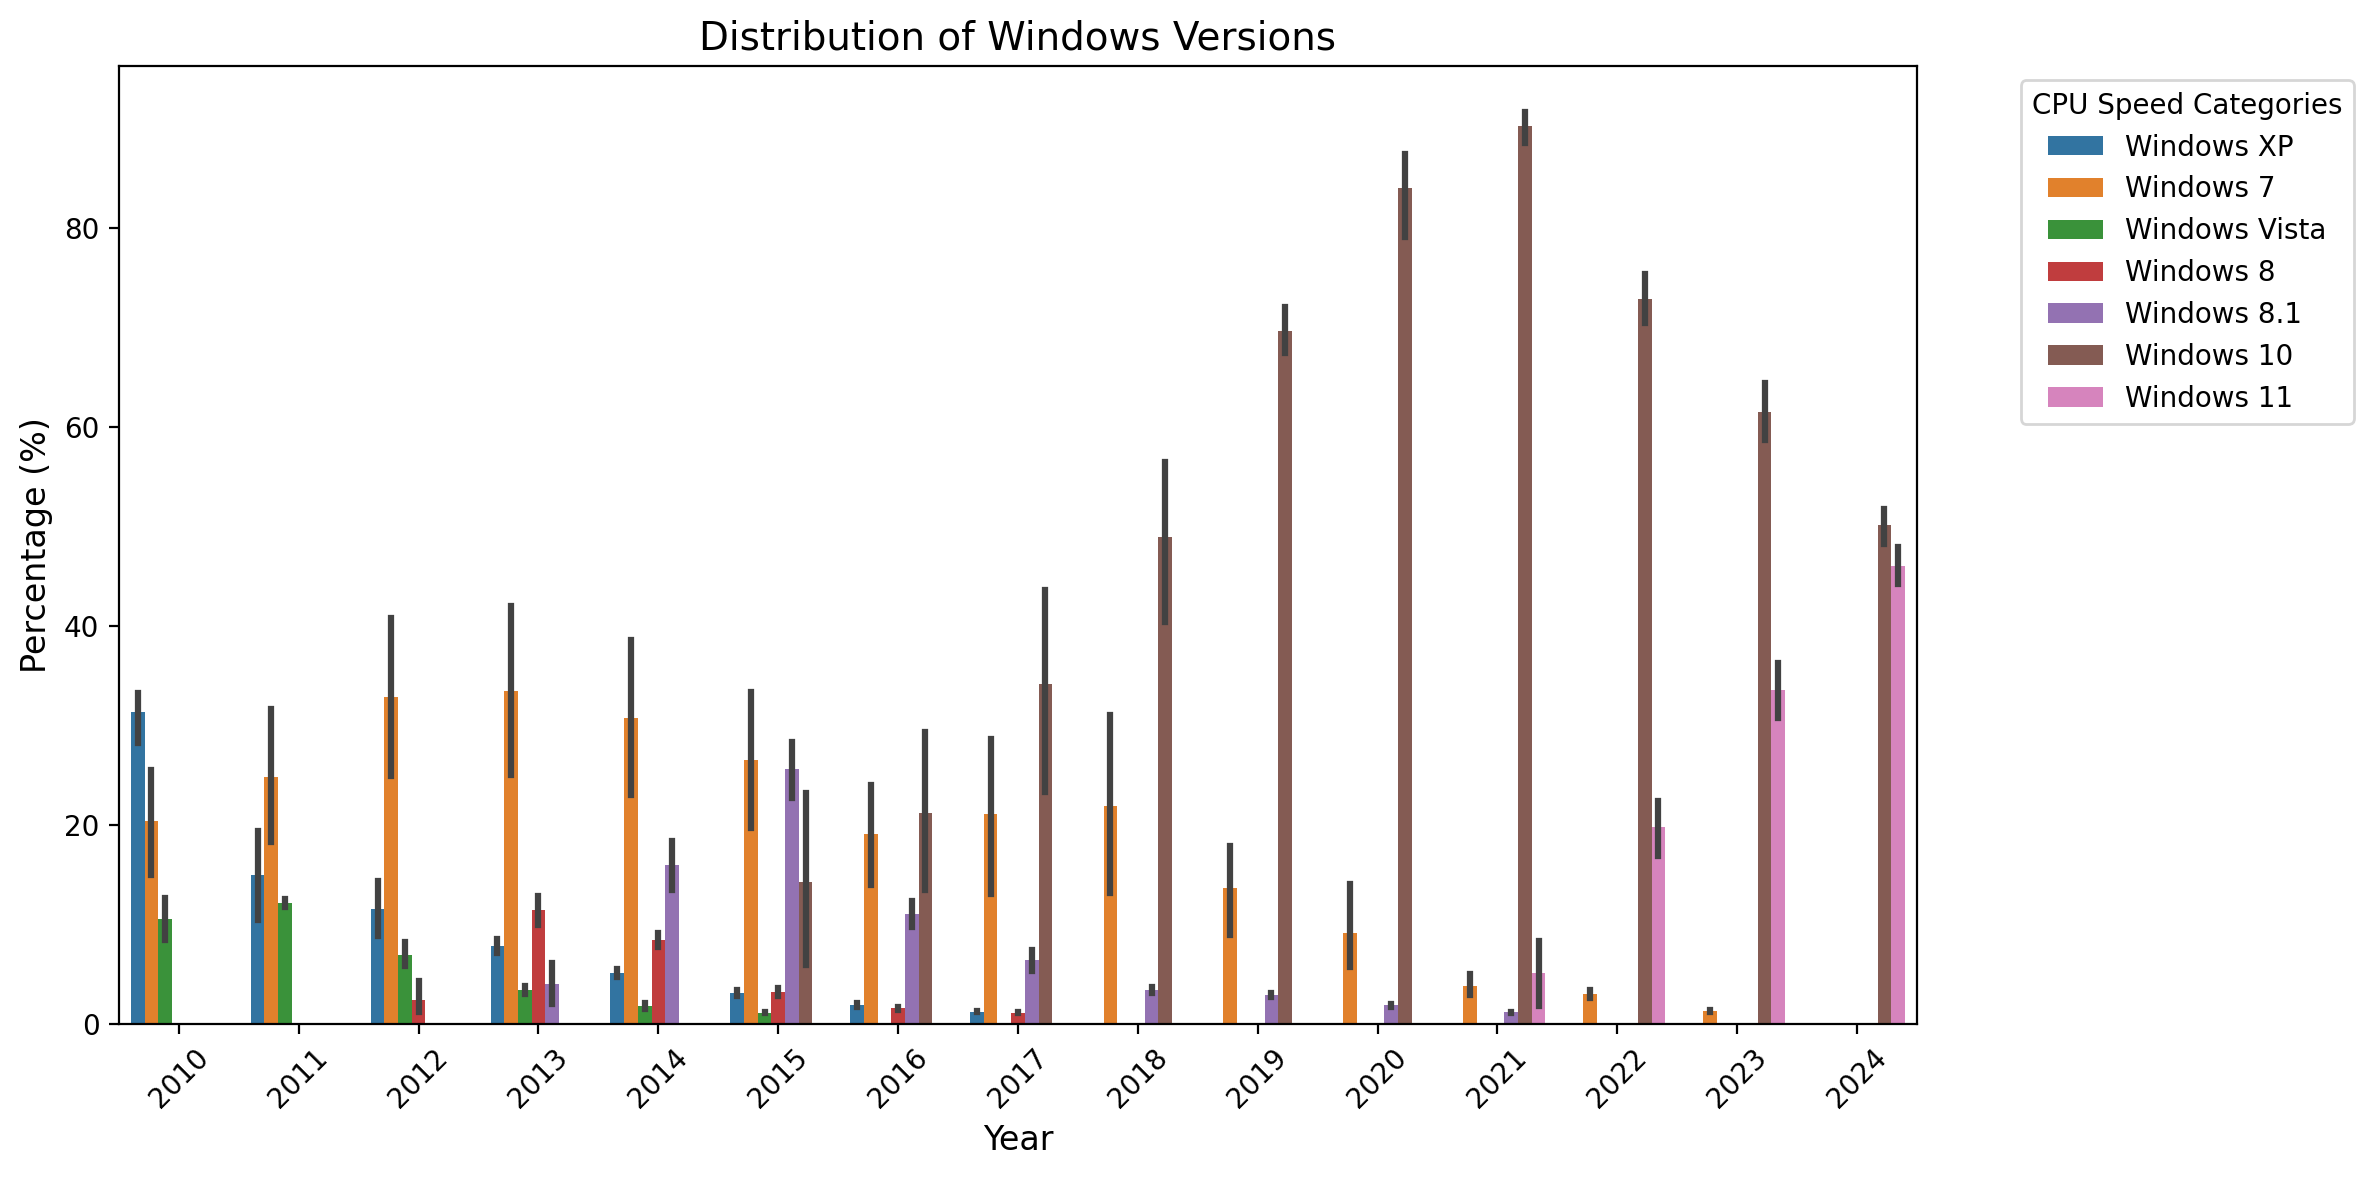

In [12]:

df_windows_version['index'] = df_windows_version['index'].replace({
    'Windows XP 32 bit': 'Windows XP',
    'Windows XP 64 bit': 'Windows XP',
    'Windows 7 64 bit': 'Windows 7',
    'Windows Vista 32 bit': 'Windows Vista',
    'Windows Vista 64 bit': 'Windows Vista',
    'Windows 8 64 bit': 'Windows 8',
    'Windows 8.1 64 bit': 'Windows 8.1',
    'Windows 10 64 bit': 'Windows 10',
    'Windows 11 64 bit': 'Windows 11'
})
# Create the plot
plt.figure(figsize=(12, 6))
sns.barplot(
    data=df_windows_version,
    x="year",
    y="perc",
    hue="index",  # Assuming "index" represents CPU speed categories
    palette="tab10"
)
plt.title("Distribution of Windows Versions", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Percentage (%)", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="CPU Speed Categories", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## Share of CPU manufacturers

In [13]:
df_cpu_vendor = df.loc[(df["category"] == "Processor Vendor") & (df["perc"] > 1)].copy()
df_cpu_vendor["year"] = df_cpu_vendor["date"].dt.year.astype(str)
df_cpu_vendor

,index,perc,category,date,platform,year
136,AuthenticAMD,47.08,Processor Vendor,2004-10-01,pc,2004
139,GenuineIntel,52.91,Processor Vendor,2004-10-01,pc,2004
423,AuthenticAMD,46.77,Processor Vendor,2004-11-01,pc,2004
428,GenuineIntel,53.21,Processor Vendor,2004-11-01,pc,2004
729,AuthenticAMD,46.77,Processor Vendor,2004-12-01,pc,2004
...,...,...,...,...,...,...
333756,GenuineIntel,28.98,Processor Vendor,2024-10-01,linux,2024
334067,AuthenticAMD,70.01,Processor Vendor,2024-11-01,linux,2024
334068,GenuineIntel,29.98,Processor Vendor,2024-11-01,linux,2024
334384,AuthenticAMD,69.85,Processor Vendor,2024-12-01,linux,2024


In [14]:
df_cpu_vendor_pc = (
    df_cpu_vendor.loc[df_cpu_vendor["platform"] == "pc"]
    .groupby(["year", "index"])
    .mean()
    .reset_index()
)
df_cpu_vendor_pc.head(5)

,year,index,perc
0,2004,AuthenticAMD,46.873333
1,2004,GenuineIntel,53.110000
2,2005,AuthenticAMD,47.441818
3,2005,GenuineIntel,52.543636
4,2006,AuthenticAMD,51.307500


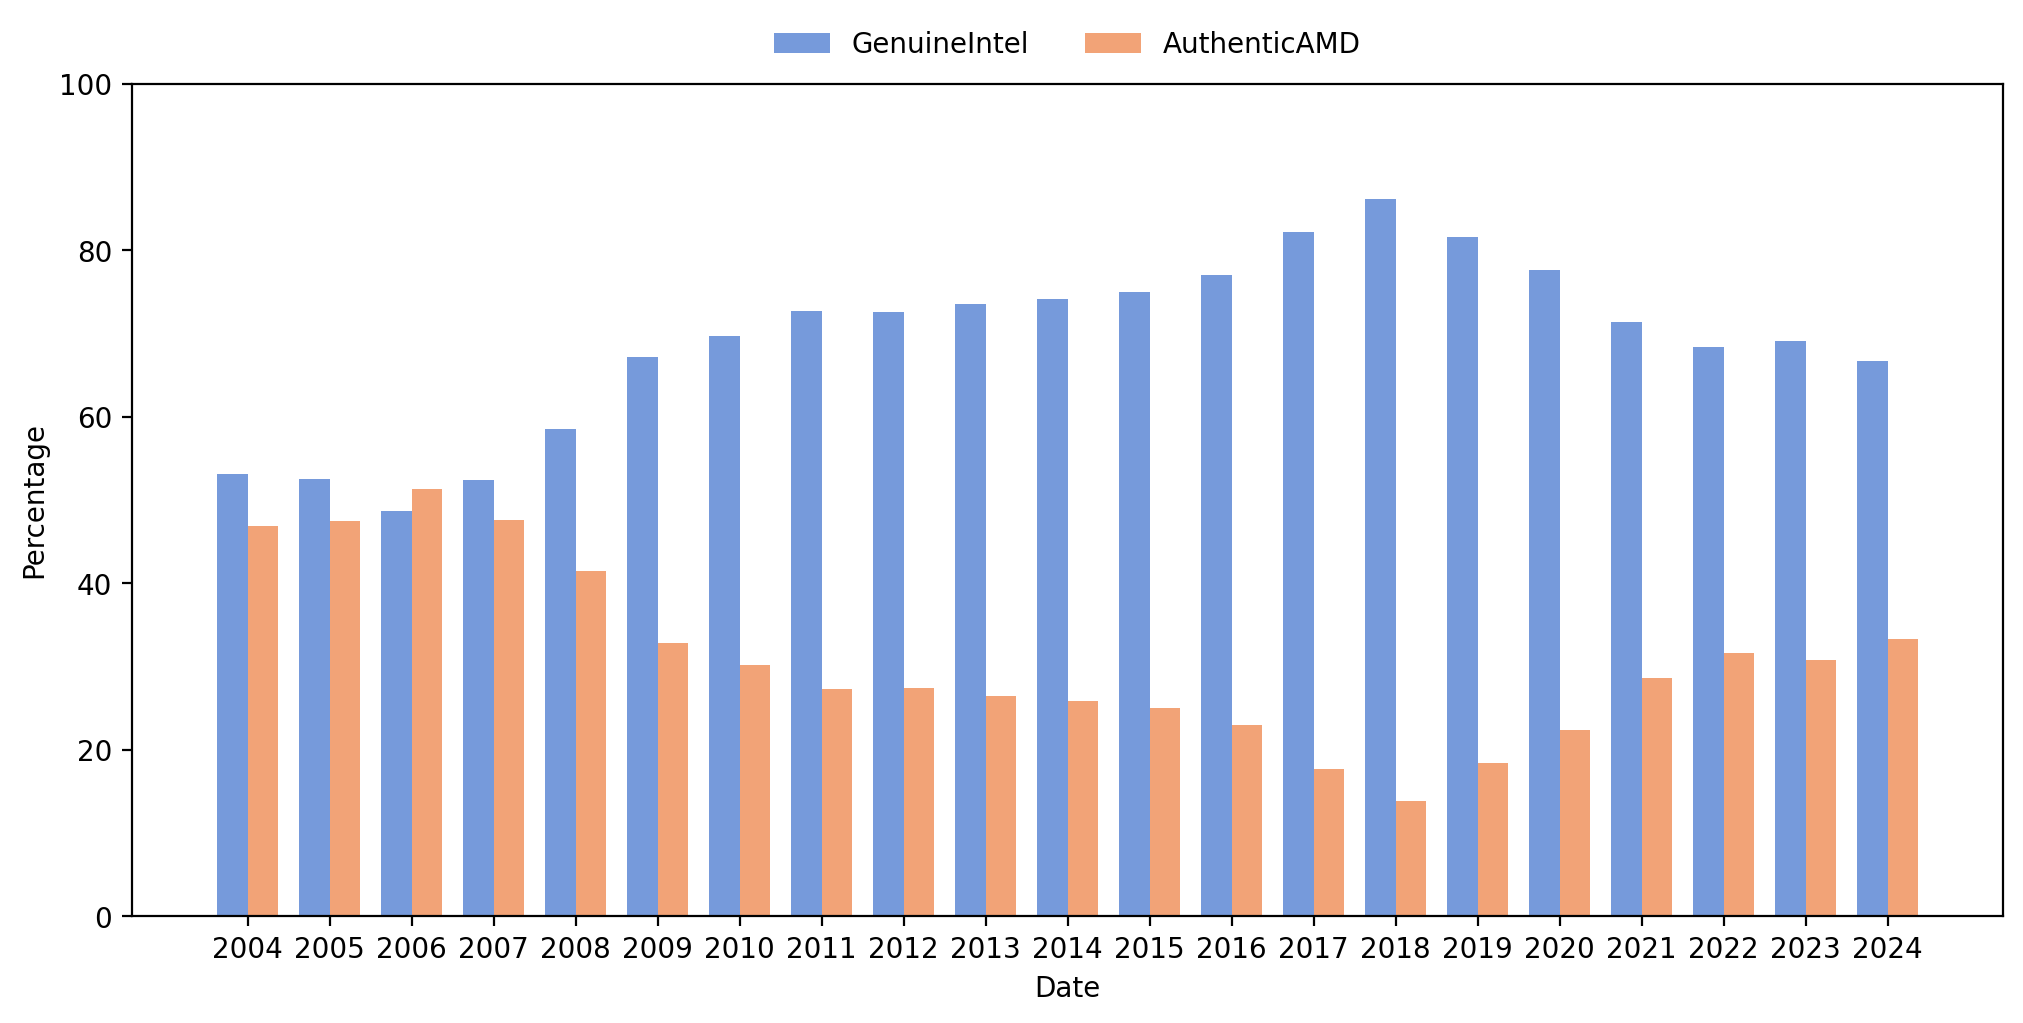

In [15]:
_, ax = plt.subplots(nrows=1, figsize=(10, 5), constrained_layout=True)
ax.set(xlabel="Date", ylabel="Percentage", ylim=[0, 100])
sns.histplot(
    df_cpu_vendor_pc,
    x="year",
    hue="index",
    weights="perc",
    multiple="dodge",
    discrete=True,
    hue_order=["GenuineIntel", "AuthenticAMD"],
    palette="muted",
    shrink=0.75,
    linewidth=0.0,
    ax=ax,
)
sns.move_legend(
    ax, "lower center", bbox_to_anchor=(0.5, 1), ncol=2, title=None, frameon=False
)

The chart depicts the trend of CPU brand distribution (GenuineIntel and AuthenticAMD) from 2004 to 2024 according to their percentage of use. In all years, GenuineIntel (blue bars) consistently outperforms the market, with a greater proportion of usage than AuthenticAMD (orange bars).

During the period between the years 2004 and 2007, the two brands had very similar market shares, GenuineIntel fluctuated from 50% to 55% and AuthenticAMD from 45% to 50%. However, from 2008 onwards, a noticeable gap emerges as GenuineIntel's market share increases, peaking between 2010 and 2018 at around 70% to 85%, while AuthenticAMD steadily declines to a low of around 15% during this period. The lowest bottom for AuthenticAMD seems to fall between 2017 and 2018 when Share goes below 20%.

From 2019, AuthenticAMD begins to recover slightly, and its market share increases progressively until about 30% to 35% in 2024. While, at the same time, GenuineIntel's market share drops slightly but still leads above 65% in 2024.

Taken together, the chart shows the enduring position of GenuineIntel at the top of the CPU market over the period of the two decades, with AuthenticAMD showing some periods of decline that have been met with a small upswing in recent years. All this reflects changes in market competition and in technology and in consumer behaviour.


Same plot with stacked barchart:

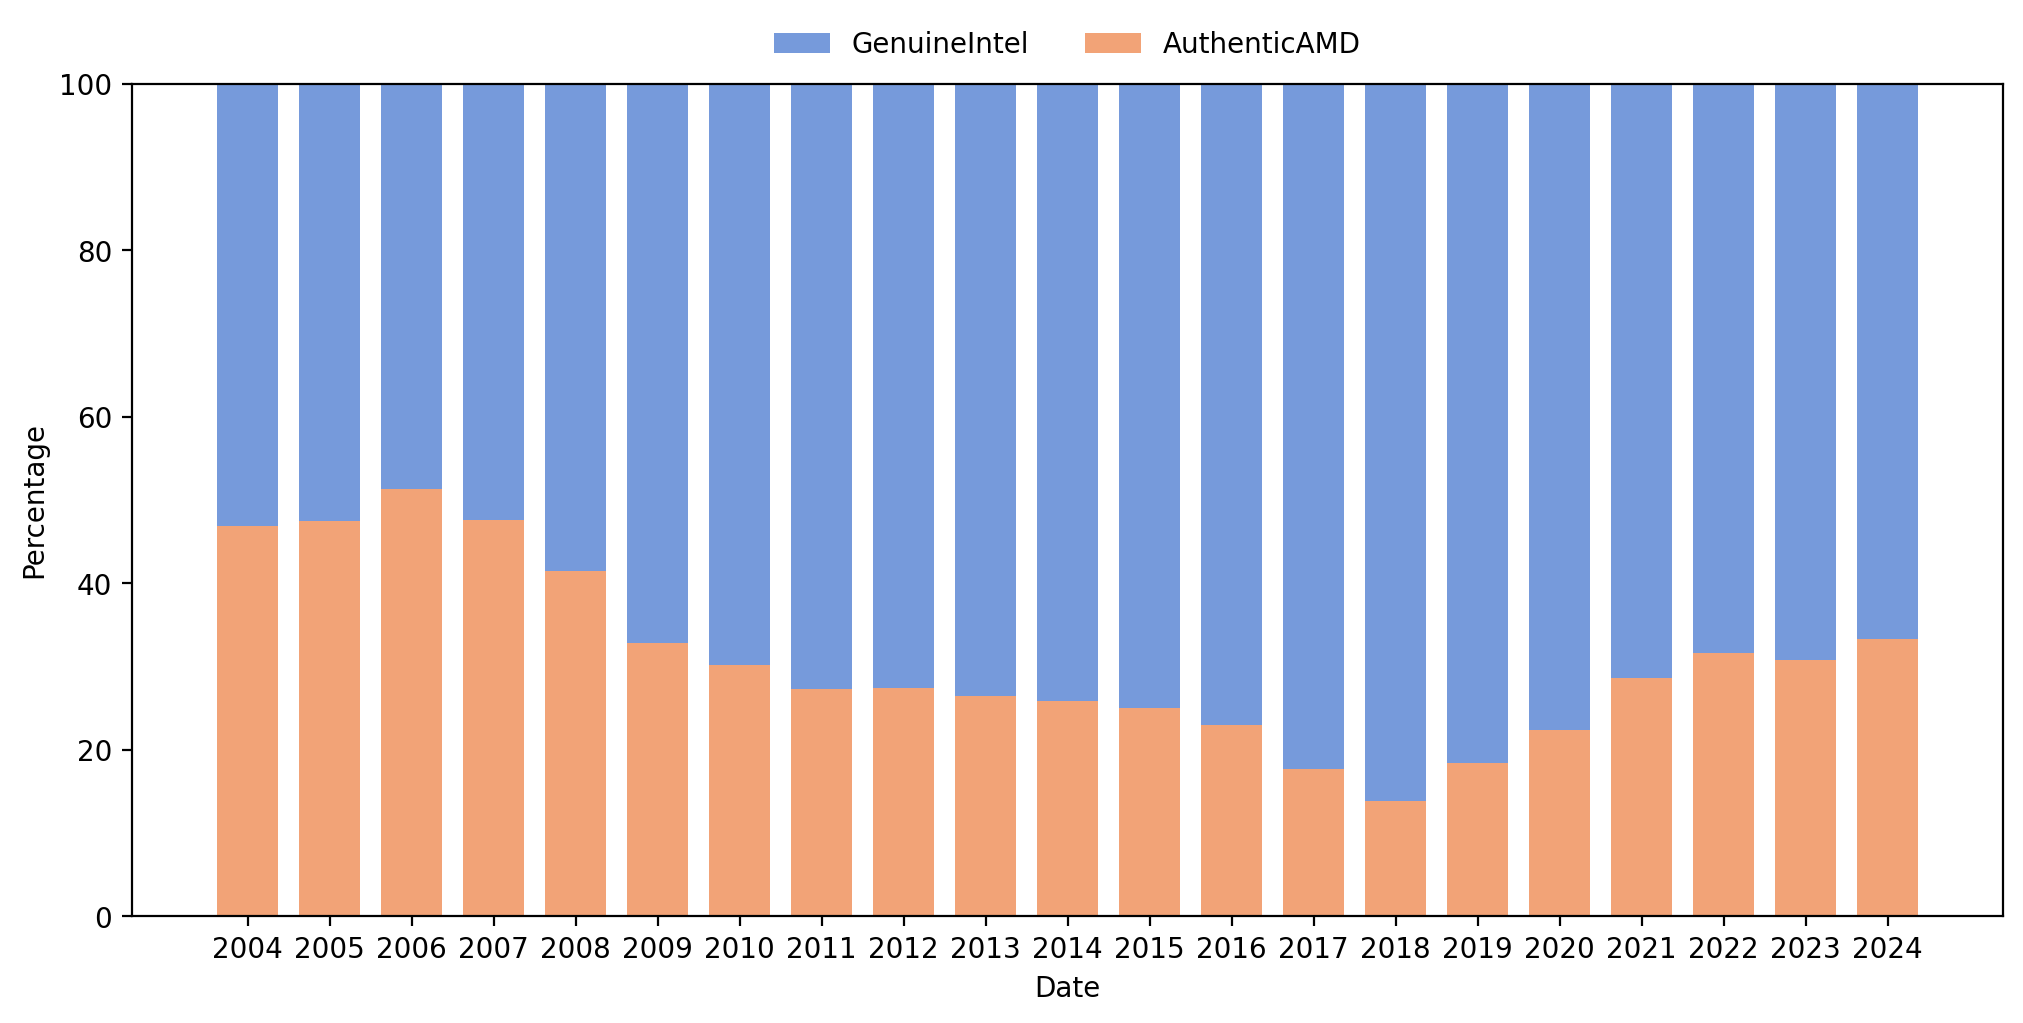

In [16]:
_, ax = plt.subplots(nrows=1, figsize=(10, 5), constrained_layout=True)
ax.set(xlabel="Date", ylabel="Percentage", ylim=[0, 100])
sns.histplot(
    df_cpu_vendor_pc,
    x="year",
    hue="index",
    weights="perc",
    multiple="stack",
    discrete=True,
    hue_order=["GenuineIntel", "AuthenticAMD"],
    palette="muted",
    shrink=0.75,
    linewidth=0.0,
    ax=ax,
)
sns.move_legend(
    ax, "lower center", bbox_to_anchor=(0.5, 1), ncol=2, title=None, frameon=False
)

Monthly share of CPUs with platform information.

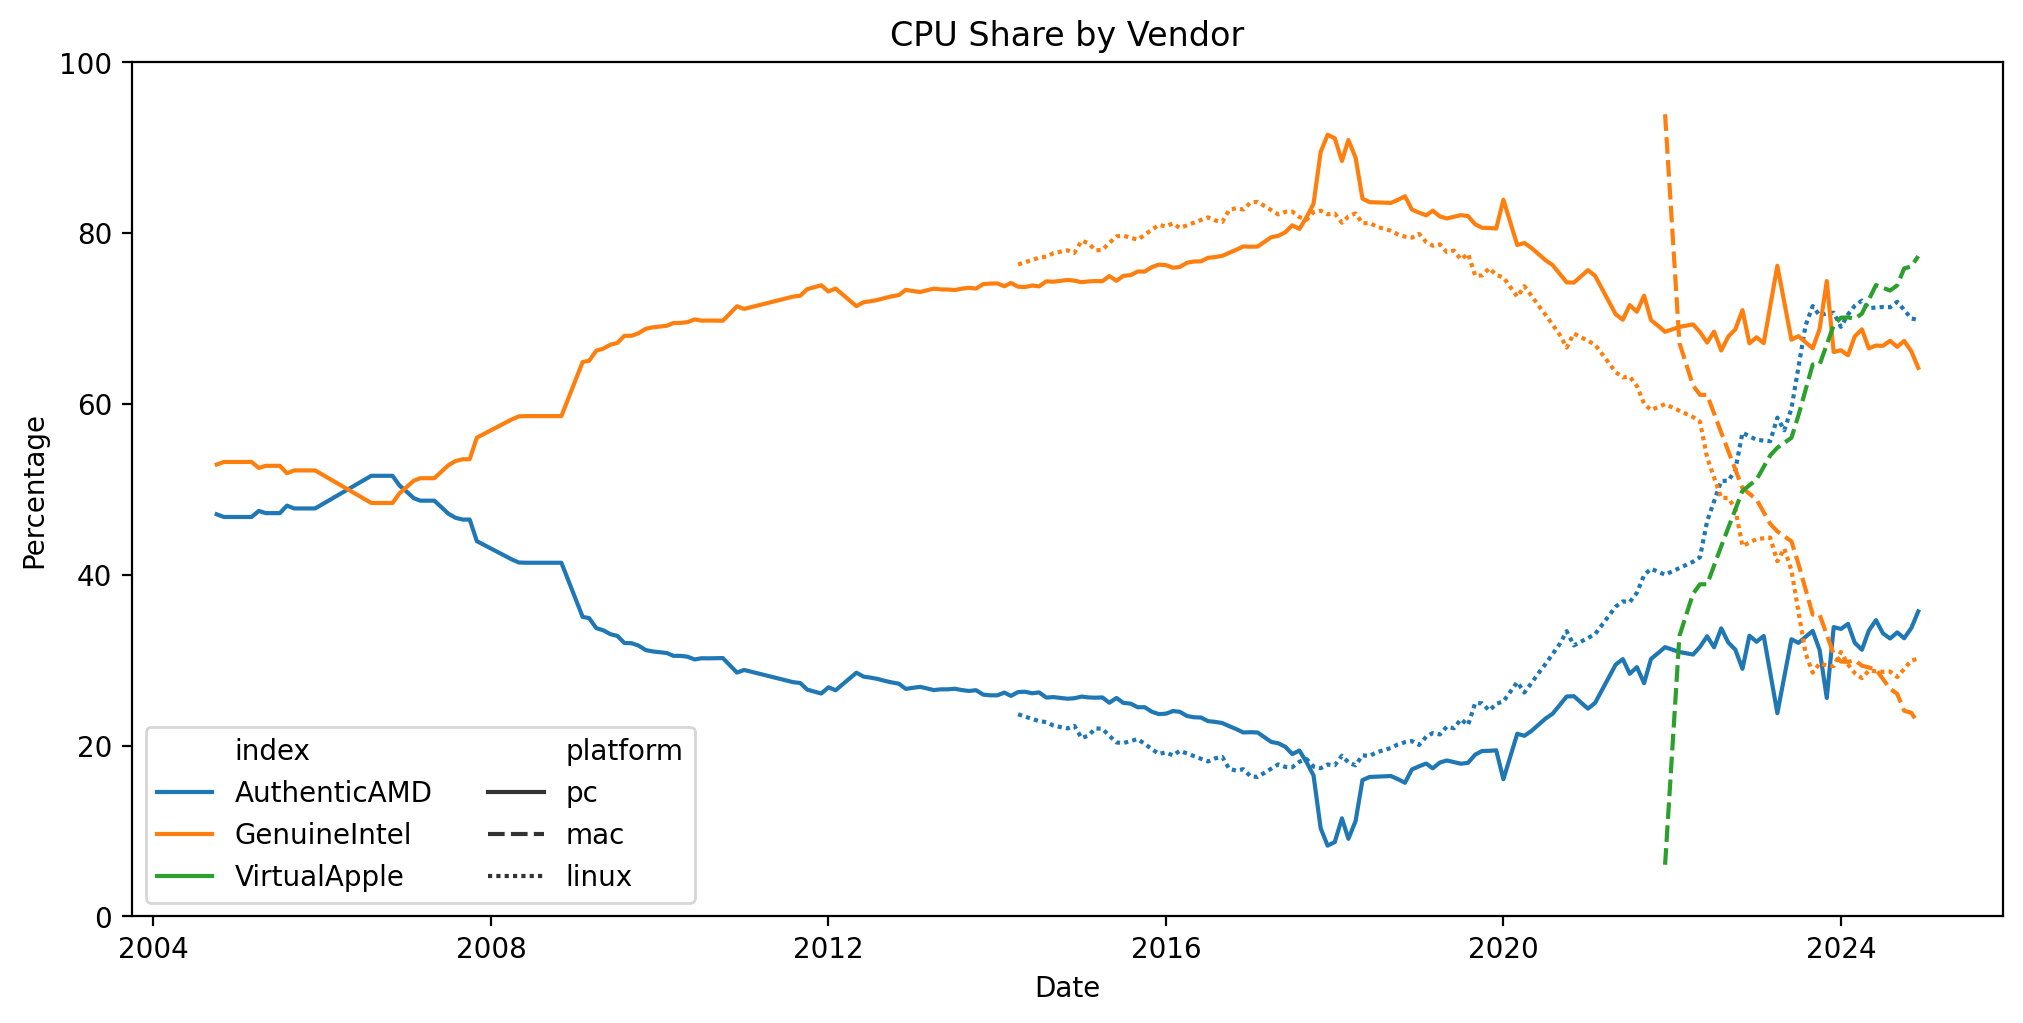

In [17]:
_, ax = plt.subplots(nrows=1, figsize=(10, 5), constrained_layout=True)
sns.lineplot(
    x="date",
    y="perc",
    hue="index",
    style="platform",
    data=df_cpu_vendor,
    style_order=["pc", "mac", "linux"],
)
ax.set(title="CPU Share by Vendor", xlabel="Date", ylabel="Percentage", ylim=[0, 100])
sns.move_legend(ax, "lower left", ncol=2)

The graph illustrates the CPU market share trends by vendor (AuthenticAMD, GenuineIntel, and VirtualApple) across different platforms (PC, Mac, and Linux) from 2004 to 2024. Intel initially dominated the market, particularly on PC platforms, maintaining a stronghold until 2016. However, its share began to decline significantly, reflecting increased competition from AMD and Apple.

AMD’s market share, after declining post-2007, started to recover steadily around 2016, likely due to the success of its Ryzen series, leading to a resurgence in the PC market. Apple’s introduction of in-house processors (VirtualApple) for Mac devices in 2020 marked a sharp rise in its CPU share, highlighting the impact of its transition away from Intel. On Linux platforms, the graph shows a more varied distribution of market share among vendors, reflecting the diverse hardware preferences in the open-source community. This analysis reveals the evolving landscape of the CPU market, driven by competition, innovation, and strategic shifts in platform-specific adoption.


In [18]:
df_cpu_vendor = (
    df_cpu_vendor.groupby(["index", df_cpu_vendor["date"].dt.year, "platform"])
    .mean()
    .reset_index()
)
df_cpu_vendor.pivot(index=["platform", "index"], columns="date", values="perc")

date                        2004       2005     2006       2007       2008  \
platform index                                                               
combined AuthenticAMD        NaN        NaN      NaN        NaN        NaN   
         GenuineIntel        NaN        NaN      NaN        NaN        NaN   
         VirtualApple        NaN        NaN      NaN        NaN        NaN   
linux    AuthenticAMD        NaN        NaN      NaN        NaN        NaN   
         GenuineIntel        NaN        NaN      NaN        NaN        NaN   
         VirtualApple        NaN        NaN      NaN        NaN        NaN   
mac      AuthenticAMD        NaN        NaN      NaN        NaN        NaN   
         GenuineIntel        NaN        NaN      NaN        NaN        NaN   
         VirtualApple        NaN        NaN      NaN        NaN        NaN   
pc       AuthenticAMD  46.873333  47.441818  51.3075  47.576364  41.468571   
         GenuineIntel  53.110000  52.543636  48.6925  52.417273  58.521429   
         VirtualApple        NaN        NaN      NaN        NaN        NaN   

date                        2009    2010    2011    2012       2013  ...  \
platform index                                                       ...   
combined AuthenticAMD        NaN     NaN     NaN     NaN        NaN  ...   
         GenuineIntel        NaN     NaN     NaN     NaN        NaN  ...   
         VirtualApple        NaN     NaN     NaN     NaN        NaN  ...   
linux    AuthenticAMD        NaN     NaN     NaN     NaN        NaN  ...   
         GenuineIntel        NaN     NaN     NaN     NaN        NaN  ...   
         VirtualApple        NaN     NaN     NaN     NaN        NaN  ...   
mac      AuthenticAMD        NaN     NaN     NaN     NaN        NaN  ...   
         GenuineIntel        NaN     NaN     NaN     NaN        NaN  ...   
         VirtualApple        NaN     NaN     NaN     NaN        NaN  ...   
pc       AuthenticAMD  32.826364  30.255  27.256  27.457  26.495833  ...   
         GenuineIntel  67.163636  69.739  72.742  72.538  73.500833  ...   
         VirtualApple        NaN     NaN     NaN     NaN        NaN  ...   

date                        2015       2016       2017       2018       2019  \
platform index                                                                 
combined AuthenticAMD        NaN        NaN        NaN        NaN        NaN   
         GenuineIntel        NaN        NaN        NaN        NaN        NaN   
         VirtualApple        NaN        NaN        NaN        NaN        NaN   
linux    AuthenticAMD  20.853333  18.264444  17.476000  19.083636  22.715833   
         GenuineIntel  79.147778  81.734444  82.523000  80.917273  77.283333   
         VirtualApple        NaN        NaN        NaN        NaN        NaN   
mac      AuthenticAMD        NaN        NaN        NaN        NaN        NaN   
         GenuineIntel        NaN        NaN        NaN        NaN        NaN   
         VirtualApple        NaN        NaN        NaN        NaN        NaN   
pc       AuthenticAMD  24.983333  22.989167  17.753636  13.811000  18.375455   
         GenuineIntel  75.015833  77.001667  82.173636  86.151000  81.610909   
         VirtualApple        NaN        NaN        NaN        NaN        NaN   

date                        2020      2021       2022       2023       2024  
platform index                                                               
combined AuthenticAMD        NaN       NaN        NaN        NaN        NaN  
         GenuineIntel        NaN       NaN        NaN        NaN        NaN  
         VirtualApple        NaN       NaN        NaN        NaN        NaN  
linux    AuthenticAMD  29.020000  37.69750  48.682857  63.854000  70.895455  
         GenuineIntel  70.977778  62.30125  51.315714  36.142000  29.099091  
         VirtualApple        NaN       NaN        NaN        NaN        NaN  
mac      AuthenticAMD        NaN       NaN        NaN        NaN        NaN  
         GenuineInt

## CPU core count

In [19]:
df_num_cpu = df.loc[
    (df["category"] == "Physical CPUs") & (df["index"] != "Unspecified")
].copy()
df_num_cpu["num_cpus"] = df_num_cpu["index"].str.strip("cpus").astype(int)
df_num_cpu.loc[df_num_cpu["num_cpus"] > 16, "index"] = ">16 cpus"
df_num_cpu.drop(columns=["num_cpus"], inplace=True)
df_num_cpu

,index,perc,category,date,platform
142,1 cpu,99.81,Physical CPUs,2004-10-01,pc
143,2 cpus,0.19,Physical CPUs,2004-10-01,pc
431,1 cpu,99.80,Physical CPUs,2004-11-01,pc
432,2 cpus,0.20,Physical CPUs,2004-11-01,pc
737,1 cpu,99.76,Physical CPUs,2004-12-01,pc
...,...,...,...,...,...
334430,>16 cpus,0.00,Physical CPUs,2024-12-01,linux
334431,>16 cpus,0.01,Physical CPUs,2024-12-01,linux
334432,>16 cpus,0.00,Physical CPUs,2024-12-01,linux
334433,>16 cpus,0.00,Physical CPUs,2024-12-01,linux


In [20]:
cat_num_cpu = CategoricalDtype(
    [
        "1 cpu",
        "2 cpus",
        # "3 cpus",
        "4 cpus",
        "6 cpus",
        "8 cpus",
        "10 cpus",
        "12 cpus",
        "16 cpus",
        ">16 cpus",
    ],
    ordered=True,
)
df_num_cpu["index"] = df_num_cpu["index"].astype(cat_num_cpu)

In [21]:
# sum all '+16 cpus' percentages for each month
df_num_cpu = (
    df_num_cpu.groupby(["index", "date", "platform"], as_index=False)
    .sum()
    .replace(0, np.nan)
)
# compute mean annual share
df_num_cpu = (
    df_num_cpu.groupby(["index", df_num_cpu["date"].dt.year, "platform"])
    .mean()
    .reset_index()
)
df_num_cpu["date"] = df_num_cpu["date"].astype(str)

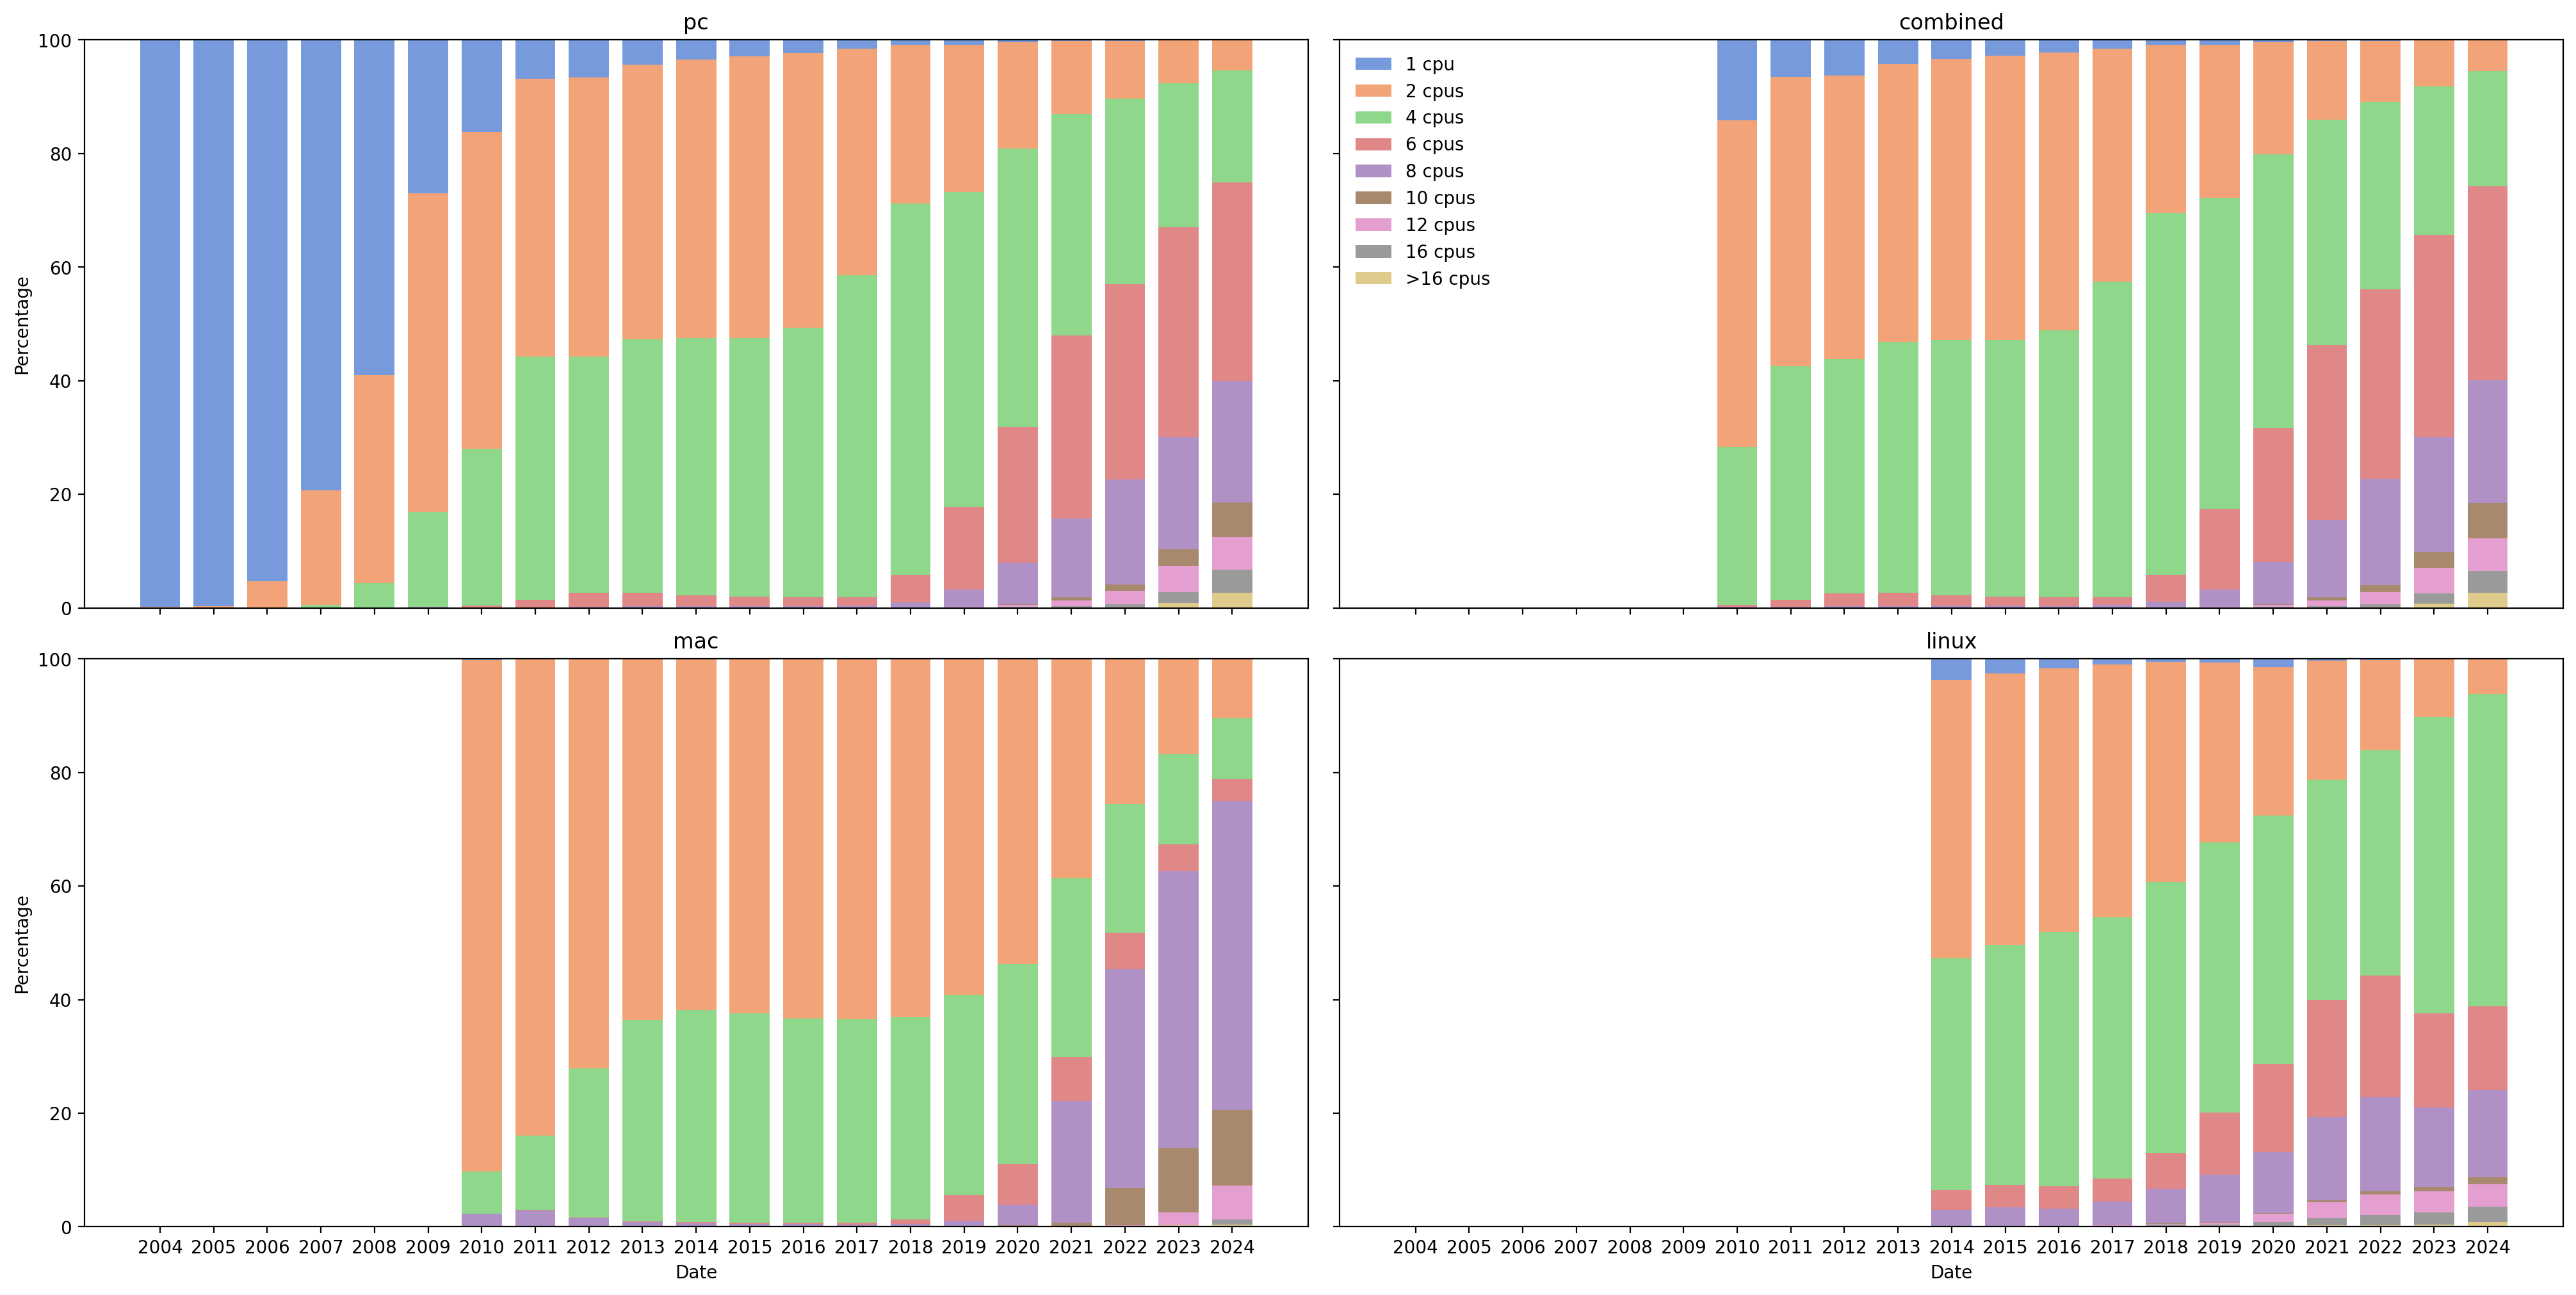

In [22]:
df_normalized = df_num_cpu.copy()
df_normalized["perc"] = (
    df_normalized.groupby(["platform", "date"])["perc"]
    .transform(lambda x: (x / x.sum()) * 100)
)

# Plotting
_, axes = plt.subplots(
    nrows=2,
    ncols=2,
    figsize=(20, 10),
    constrained_layout=True,
    sharey=True,
    sharex=True,
)

for ax, subset in zip(axes.flat, ["pc", "combined", "mac", "linux"]):
    sns.histplot(
        df_normalized.loc[df_normalized["platform"] == subset],
        x="date",
        hue="index",
        weights="perc",
        multiple="stack",
        discrete=True,
        palette="muted",
        shrink=0.75,
        linewidth=0.0,
        ax=ax,
        legend=True if subset == "combined" else False,
    )
    ax.set(title=f"{subset}", xlabel="Date", ylabel="Percentage", ylim=[0, 100])
    if subset == "combined":
        sns.move_legend(
            ax,
            "upper left",
            bbox_to_anchor=(0, 1),
            title=None,
            frameon=False,
        )

plt.show()

The chart provides a comprehensive overview of the evolution of CPU core distributions across various platforms (PC, Mac, Linux, and Combined) from 2004 to 2024. It highlights a clear transition from single-core processors to multi-core architectures over the years, reflecting advancements in technology and the growing demand for higher computational efficiency.

Initially, single-core CPUs dominated the market until around 2008 across all platforms. However, as the need for multitasking and improved processing power grew, dual-core CPUs started gaining traction. By 2010, dual-core processors had become the leading configuration across most platforms. Subsequently, four-core CPUs saw a sharp rise in adoption, especially after 2010, driven by the increasing demands of modern applications and gaming.

From 2015 onward, higher core counts, including 6-core, 8-core, and 10-core CPUs, began to gain significant market share, particularly in PC and Linux platforms. This shift was likely fueled by the need for more powerful systems for gaming, productivity, and professional workloads. By 2020, configurations with more than 8 cores became more prevalent, reflecting the rise of high-performance computing and server-grade hardware.

Platform-specific trends indicate that PCs have shown a steady progression in adopting multi-core CPUs, while Macs focused predominantly on 2-core and 4-core processors until the mid-2010s, transitioning to higher core counts only after 2020 as Apple introduced advanced hardware solutions. Linux platforms, commonly used in servers and professional environments, displayed the most diverse core distribution, with an earlier adoption of CPUs with higher core counts. The combined data aligns with the overall industry trend of moving toward multi-core architectures.

In conclusion, the chart underscores the CPU industry's rapid evolution toward multi-core architectures over the past two decades. This shift highlights the growing demand for enhanced multitasking capabilities, efficiency, and processing power across various platforms and computing environments, driven by technological advancements and changing user requirements.


In [23]:
df_num_cpu.pivot(index=["platform", "index"], columns="date", values="perc")

date                2004       2005     2006       2007       2008       2009  \
platform index                                                                  
combined 1 cpu       NaN        NaN      NaN        NaN        NaN        NaN   
         2 cpus      NaN        NaN      NaN        NaN        NaN        NaN   
         4 cpus      NaN        NaN      NaN        NaN        NaN        NaN   
         6 cpus      NaN        NaN      NaN        NaN        NaN        NaN   
         8 cpus      NaN        NaN      NaN        NaN        NaN        NaN   
         10 cpus     NaN        NaN      NaN        NaN        NaN        NaN   
         12 cpus     NaN        NaN      NaN        NaN        NaN        NaN   
         16 cpus     NaN        NaN      NaN        NaN        NaN        NaN   
         >16 cpus    NaN        NaN      NaN        NaN        NaN        NaN   
linux    1 cpu       NaN        NaN      NaN        NaN        NaN        NaN   
         2 cpus      NaN        NaN      NaN        NaN        NaN        NaN   
         4 cpus      NaN        NaN      NaN        NaN        NaN        NaN   
         6 cpus      NaN        NaN      NaN        NaN        NaN        NaN   
         8 cpus      NaN        NaN      NaN        NaN        NaN        NaN   
         10 cpus     NaN        NaN      NaN        NaN        NaN        NaN   
         12 cpus     NaN        NaN      NaN        NaN        NaN        NaN   
         16 cpus     NaN        NaN      NaN        NaN        NaN        NaN   
         >16 cpus    NaN        NaN      NaN        NaN        NaN        NaN   
mac      1 cpu       NaN        NaN      NaN        NaN        NaN        NaN   
         2 cpus      NaN        NaN      NaN        NaN        NaN        NaN   
         4 cpus      NaN        NaN      NaN        NaN        NaN        NaN   
         6 cpus      NaN        NaN      NaN        NaN        NaN        NaN   
         8 cpus      NaN        NaN      NaN        NaN        NaN        NaN   
         10 cpus     NaN        NaN      NaN        NaN        NaN        NaN   
         12 cpus     NaN        NaN      NaN        NaN        NaN        NaN   
         16 cpus     NaN        NaN      NaN        NaN        NaN        NaN   
         >16 cpus    NaN        NaN      NaN        NaN        NaN        NaN   
pc       1 cpu     99.79  99.735455  95.3225  79.260909  59.011429  26.877273   
         2 cpus     0.21   0.264545   4.6625  20.224545  36.645714  55.704545   
         4 cpus      NaN        NaN   0.0300   0.513636   4.315714  16.676364   
         6 cpus      NaN        NaN      NaN        NaN        NaN        NaN   
         8 cpus      NaN        NaN      NaN        NaN   0.018571   0.130000   
         10 cpus     NaN        NaN      NaN        NaN        NaN        NaN   
         12 cpus     NaN        NaN      NaN        NaN        NaN        NaN   
         16 cpus     NaN        NaN      NaN        NaN        NaN        NaN   
         >16 cpus    NaN        NaN      NaN        NaN        NaN        NaN   

date                    2010       2011       2012       2013  ...       2015  \
platform index                                                 ...              
combined 1 cpu     13.978000   6.411111   6.219167   4.152500  ...   2.699167   
         2 cpus    56.860000  50.330000  49.110833  47.836667  ...  48.675833   
         4 cpus    27.562000  40.516667  40.516667  43.302500  ...  43.873333   
         6 cpus     0.340000   1.216667   2.314167   2.279167  ...   1.630000   
         8 cpus     0.190000   0.201111   0.222500   0.290833  ...   0.328333   
         10 cpus         NaN        NaN        NaN        NaN  ...        NaN   
         12 cpus    0.010000   0.010000   0.010000   0.010000  ...   0.010000   
         16 cpus         NaN        NaN        NaN        NaN  ...        NaN   
         >16 cpus        NaN        NaN        NaN        NaN  ...        NaN   
linux    1 cpu           NaN  

## Linux flavors

In [25]:
df_linux = df.loc[(df["category"] == "Linux Version")].copy()
df_linux

,index,perc,category,date,platform
304766,Ubuntu 13.10 64 bit,26.33,Linux Version,2014-02-01,linux
304767,Ubuntu 12.04.3 LTS 64 bit,7.68,Linux Version,2014-02-01,linux
304768,Linux 64 bit,6.76,Linux Version,2014-02-01,linux
304769,Linux Mint 16 Petra 64 bit,6.46,Linux Version,2014-02-01,linux
304770,Ubuntu 13.10,5.25,Linux Version,2014-02-01,linux
...,...,...,...,...,...
334366,Ubuntu Core 22 64 bit,3.76,Linux Version,2024-12-01,linux
334367,"""Manjaro Linux"" 64 bit",2.99,Linux Version,2024-12-01,linux
334368,Debian GNU/Linux 12 (bookworm) 64 bit,2.52,Linux Version,2024-12-01,linux
334369,Pop!_OS 22.04 LTS 64 bit,2.49,Linux Version,2024-12-01,linux


In [26]:
df_linux["index"] = (
    df_linux["index"]
    .replace(to_replace=r" \d.*$", value="", regex=True)
    .astype("category")
)
# sum the cleaned distro shares
df_linux = df_linux.groupby(["index", "date"], as_index=False).sum()
# compute mean annual share
df_linux = df_linux.groupby(["index", df_linux["date"].dt.year]).mean().reset_index()
df_linux["date"] = df_linux["date"].astype(str)

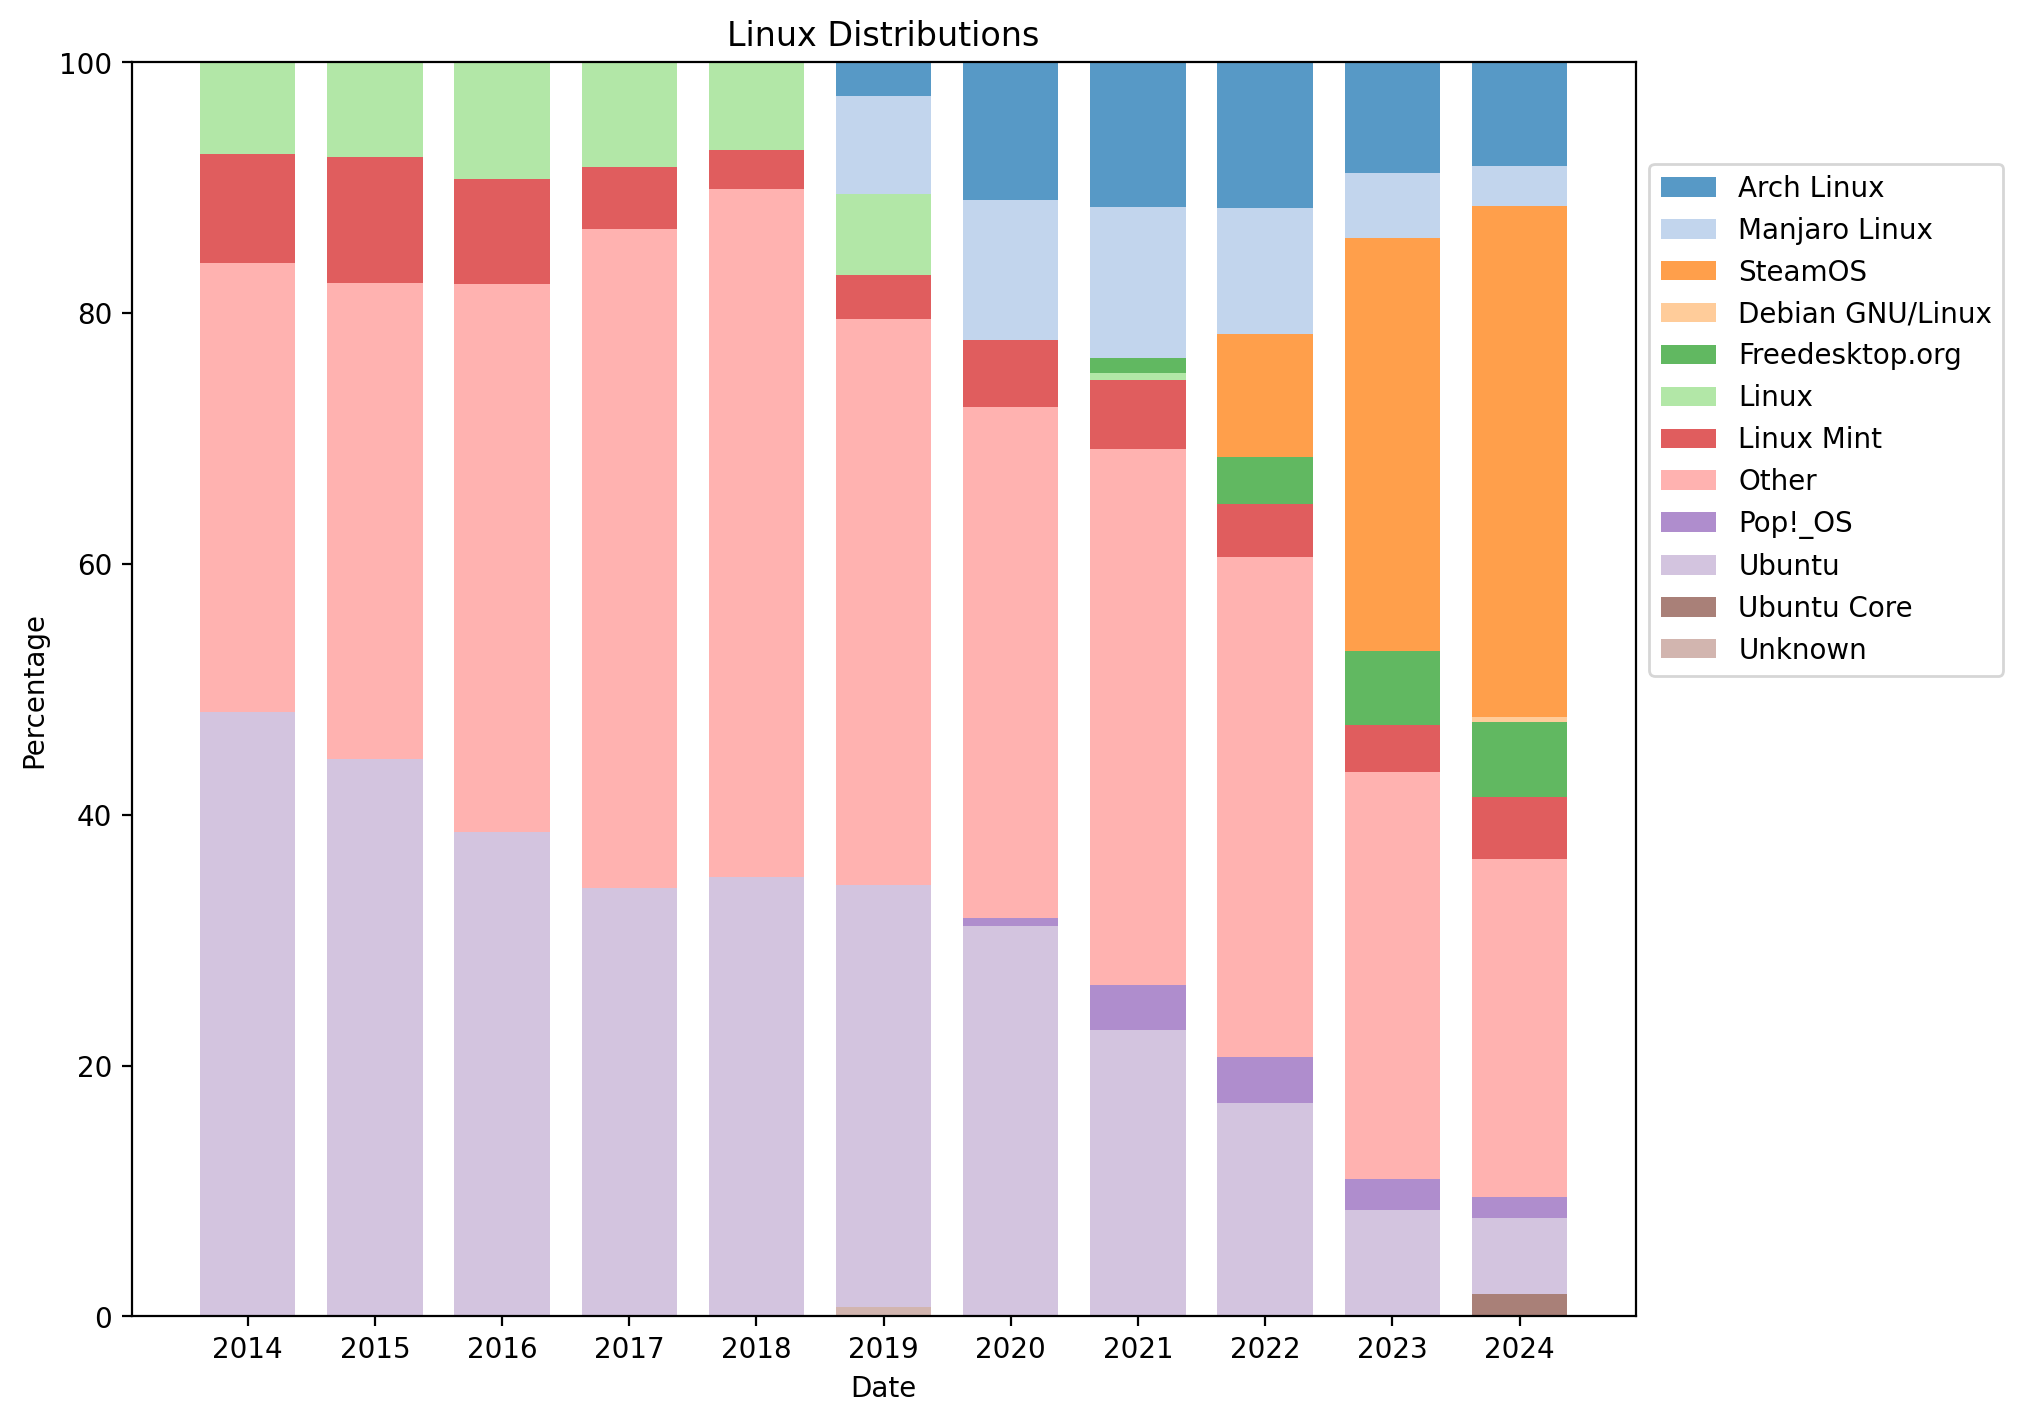

In [27]:
# Combine different Freedesktop.org names into a single category
df_linux_combined = df_linux.copy()
df_linux_combined["index"] = df_linux_combined["index"].replace({
    "Freedesktop SDK": "Freedesktop.org",
    "Freedesktop.org SDK": "Freedesktop.org",
    "Description:Freedesktop.org": "Freedesktop.org",
    '"Arch Linux"' : "Arch Linux",
    '"Manjaro Linux"' : "Manjaro Linux",
    '"SteamOS Holo"' : "SteamOS"
})

# Plotting the combined data
_, ax = plt.subplots(nrows=1, figsize=(10, 7), constrained_layout=True)
sns.histplot(
    df_linux_combined,
    x="date",
    hue="index",
    weights="perc",
    multiple="stack",
    palette="tab20",
    discrete=True,
    shrink=0.75,
    linewidth=0.0,
    ax=ax,
)
ax.set(title="Linux Distributions", xlabel="Date", ylabel="Percentage", ylim=[0, 100])
sns.move_legend(ax, "lower left", bbox_to_anchor=(1, 0.5), title=None)

plt.show()


This chart depicts the relative popularity of various Linux distributions over time, from 2014 to 2024, based on their percentage usage. The chart includes major distributions like Ubuntu, Debian GNU/Linux, Arch Linux, and others, along with a category for unknown distributions.

From the visualization, Ubuntu consistently dominated the market share until around 2020, after which its prominence declined slightly. Starting in 2020, there is noticeable growth in the use of distributions like Arch Linux, Manjaro Linux, and Pop!_OS, reflecting a diversification in user preferences. The "Unknown" category also saw a significant reduction over time, indicating better reporting or categorization of distributions in recent years.

Another key trend is the gradual decline of Debian GNU/Linux's share, suggesting a shift in preference from foundational distributions to newer, user-friendly derivatives like Pop!_OS and Linux Mint. SteamOS emerges significantly post-2021, which could be attributed to the rise in gaming-related usage of Linux platforms.

In summary, the chart highlights the increasing fragmentation and diversity in the Linux ecosystem, with users exploring newer distributions while traditional ones like Ubuntu and Debian maintain a notable but reduced presence.


In [28]:
df_linux.pivot(index=["index"], columns="date", values="perc").replace(0, np.nan)

date,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
index,,,,,,,,,,,
"""Arch Linux""",NaN,NaN,NaN,NaN,NaN,2.688333,10.992222,11.55625,11.651429,8.853,8.239091
"""Manjaro Linux""",NaN,NaN,NaN,NaN,NaN,7.785833,11.112222,12.01125,10.030000,5.182,3.208182
"""SteamOS Holo""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.791429,32.900,40.737273
Debian GNU/Linux,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.450909
Description:Freedesktop.org,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.24500,1.607143,NaN,NaN
Freedesktop SDK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.921818
Freedesktop.org,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.620000,NaN,NaN
Freedesktop.org SDK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.502857,5.881,NaN
Linux,7.32625,7.554444,9.317778,8.327,7.020909,6.445833,NaN,0.53750,NaN,NaN,NaN


## Share of GPU manufacturers

In [29]:
# there are some errors for data collected in 2015 showing values of 'Other' > 90%
# in 2014, AMD enters the series and average values are higher than they should be
df_gpu_vendor = df.loc[
    (df["category"] == "Video Card Description") & (df["perc"] < 90)
].copy()
df_gpu_vendor["year"] = df_gpu_vendor["date"].dt.year.astype(str)
df_gpu_vendor

,index,perc,category,date,platform,year
62,NVidia GeForce4 MX Series,12.18,Video Card Description,2004-10-01,pc,2004
63,ATI Radeon 9800 Series,10.39,Video Card Description,2004-10-01,pc,2004
64,ATI Radeon 9600 Series,9.82,Video Card Description,2004-10-01,pc,2004
65,NVidia GeForce4 Series,9.65,Video Card Description,2004-10-01,pc,2004
66,NVidia GeForce FX 5200 Series,8.58,Video Card Description,2004-10-01,pc,2004
...,...,...,...,...,...,...
334521,NVIDIA GeForce GT 1030,0.17,Video Card Description,2024-12-01,linux,2024
334522,AMD Radeon RX 5500M,0.16,Video Card Description,2024-12-01,linux,2024
334523,NVIDIA GeForce RTX 3050,0.16,Video Card Description,2024-12-01,linux,2024
334524,Intel(R) Graphics (RPL-U),0.15,Video Card Description,2024-12-01,linux,2024


In [30]:
group_vendor = lambda x: df_gpu_vendor["index"].str.contains(x, case=False)

df_gpu_vendor.loc[group_vendor("AMD|Radeon"), "gpu_vendor"] = "AMD"
df_gpu_vendor.loc[group_vendor("ATI|ATI Radeon"), "gpu_vendor"] = "ATI"
df_gpu_vendor.loc[group_vendor("Intel"), "gpu_vendor"] = "Intel"
df_gpu_vendor.loc[group_vendor("NVIDIA|GeForce"), "gpu_vendor"] = "NVIDIA"
df_gpu_vendor.loc[group_vendor("Apple"), "gpu_vendor"] = "Apple"
df_gpu_vendor.loc[group_vendor("Other"), "gpu_vendor"] = "Other"
df_gpu_vendor["gpu_vendor"] = df_gpu_vendor["gpu_vendor"].replace(np.nan, "Other")

In [31]:
cat_gpu_vendor = CategoricalDtype(
    [
        "AMD",
        "Apple",
        "ATI",
        "Intel",
        "NVIDIA",
        "Other",
    ],
    ordered=True,
)
df_gpu_vendor["gpu_vendor"] = df_gpu_vendor["gpu_vendor"].astype(cat_gpu_vendor)

In [32]:
df_gpu_vendor = (
    df_gpu_vendor.groupby(["gpu_vendor", "date", "platform"], as_index=False)
    .sum()
    .replace(0, np.nan)
)
# compute mean annual share
df_gpu_vendor = (
    df_gpu_vendor.groupby(["gpu_vendor", df_gpu_vendor["date"].dt.year, "platform"])
    .mean()
    .reset_index()
)
df_gpu_vendor["date"] = df_gpu_vendor["date"].astype(str)

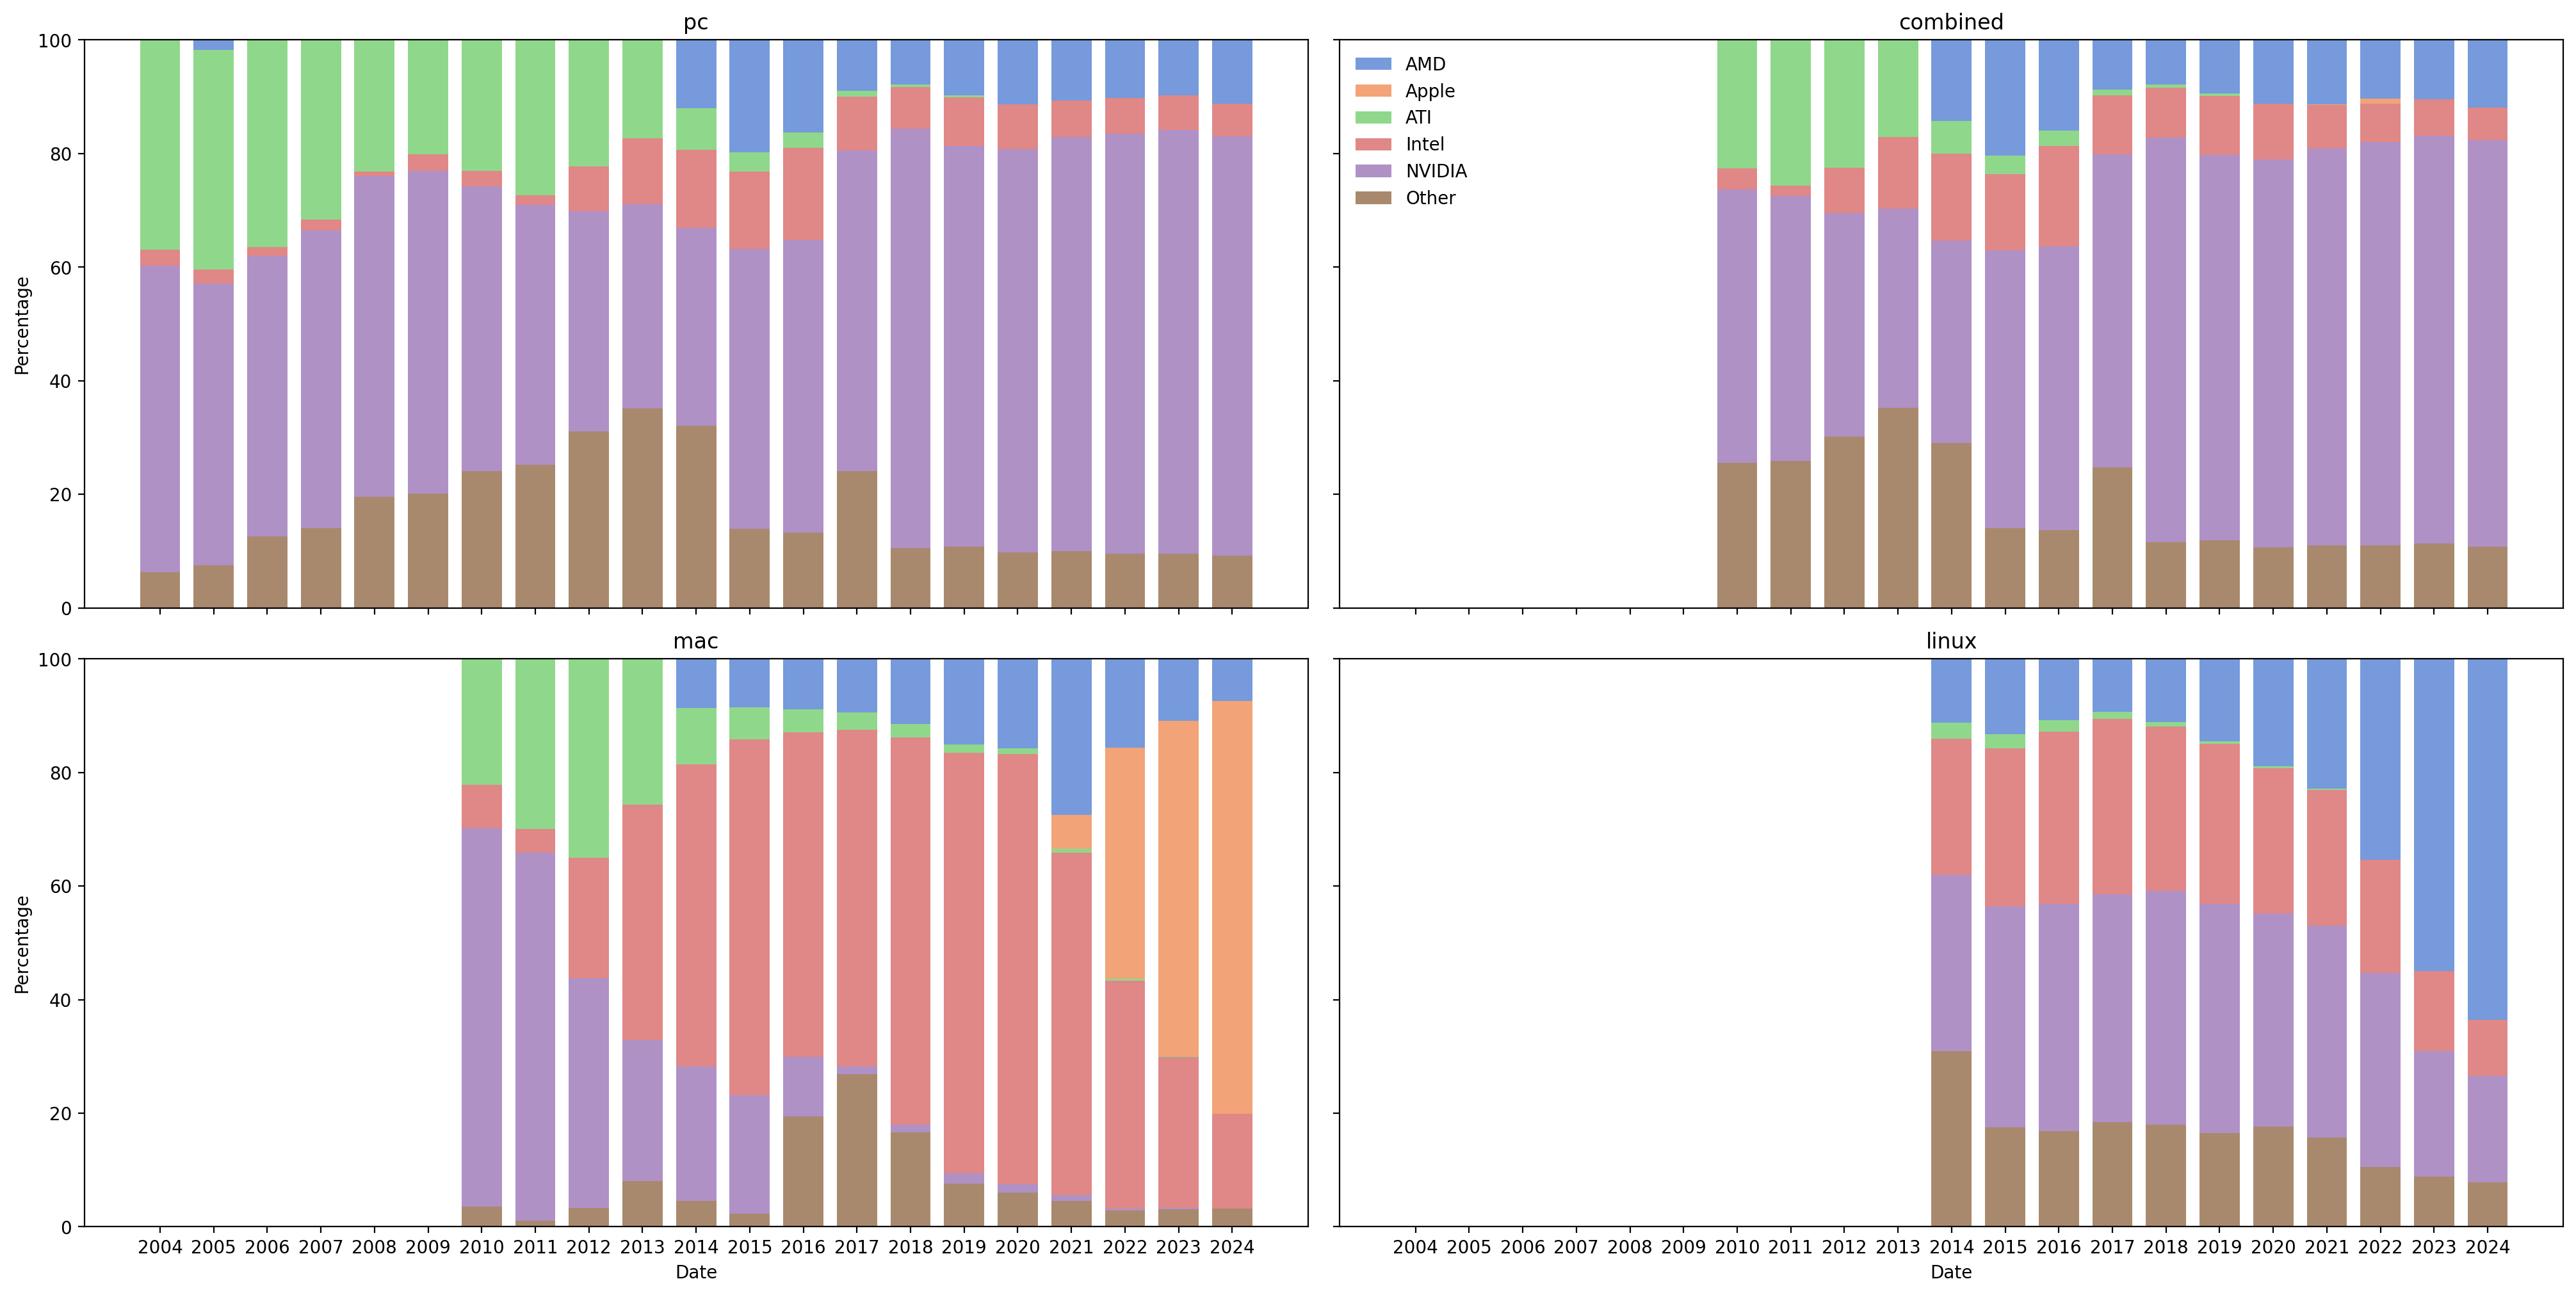

In [33]:
df_normalized_gpu_vendor = df_gpu_vendor.copy()
df_normalized_gpu_vendor["perc"] = (
    df_normalized_gpu_vendor.groupby(["platform", "date"])["perc"]
    .transform(lambda x: (x / x.sum()) * 100)
)

_, axes = plt.subplots(
    nrows=2,
    ncols=2,
    figsize=(20, 10),
    constrained_layout=True,
    sharey=True,
    sharex=True,
)
for ax, subset in zip(axes.flat, ["pc", "combined", "mac", "linux"]):
    sns.histplot(
        df_normalized_gpu_vendor.loc[df_normalized_gpu_vendor["platform"] == subset],
        x="date",
        hue="gpu_vendor",
        weights="perc",
        multiple="stack",
        discrete=True,
        palette="muted",
        shrink=0.75,
        linewidth=0.0,
        ax=ax,
        legend=True if subset == "combined" else False,
    )
    ax.set(title=f"{subset}", xlabel="Date", ylabel="Percentage", ylim=[0, 100])
    if subset == "combined":
        sns.move_legend(
            ax,
            "upper left",
            bbox_to_anchor=(0, 1),
            title=None,
            frameon=False,
        )

In [34]:
df_gpu_vendor.pivot(index=["platform", "gpu_vendor"], columns="date", values="perc")

date                      2004       2005     2006       2007       2008  \
platform gpu_vendor                                                        
combined AMD               NaN        NaN      NaN        NaN        NaN   
         Apple             NaN        NaN      NaN        NaN        NaN   
         ATI               NaN        NaN      NaN        NaN        NaN   
         Intel             NaN        NaN      NaN        NaN        NaN   
         NVIDIA            NaN        NaN      NaN        NaN        NaN   
         Other             NaN        NaN      NaN        NaN        NaN   
linux    AMD               NaN        NaN      NaN        NaN        NaN   
         Apple             NaN        NaN      NaN        NaN        NaN   
         ATI               NaN        NaN      NaN        NaN        NaN   
         Intel             NaN        NaN      NaN        NaN        NaN   
         NVIDIA            NaN        NaN      NaN        NaN        NaN   
         Other             NaN        NaN      NaN        NaN        NaN   
mac      AMD               NaN        NaN      NaN        NaN        NaN   
         Apple             NaN        NaN      NaN        NaN        NaN   
         ATI               NaN        NaN      NaN        NaN        NaN   
         Intel             NaN        NaN      NaN        NaN        NaN   
         NVIDIA            NaN        NaN      NaN        NaN        NaN   
         Other             NaN        NaN      NaN        NaN        NaN   
pc       AMD               NaN   1.772000      NaN        NaN        NaN   
         Apple             NaN        NaN      NaN        NaN        NaN   
         ATI         36.900000  39.021818  36.4775  31.683636  23.190000   
         Intel        2.806667   2.493636   1.6200   1.985000   0.767143   
         NVIDIA      54.046667  50.067273  49.3600  52.510000  56.460000   
         Other        6.243333   7.610909  12.5425  14.014545  19.588571   

date                      2009     2010       2011       2012       2013  ...  \
platform gpu_vendor                                                       ...   
combined AMD               NaN      NaN        NaN        NaN        NaN  ...   
         Apple             NaN      NaN        NaN        NaN        NaN  ...   
         ATI               NaN  22.6620  25.648889  22.473333  17.105000  ...   
         Intel             NaN   3.6960   1.800000   8.057500  12.583333  ...   
         NVIDIA            NaN  48.1600  46.667778  39.267500  35.126667  ...   
         Other             NaN  25.4820  25.884444  30.200833  35.183333  ...   
linux    AMD               NaN      NaN        NaN        NaN        NaN  ...   
         Apple             NaN      NaN        NaN        NaN        NaN  ...   
         ATI               NaN      NaN        NaN        NaN        NaN  ...   
         Intel             NaN      NaN        NaN        NaN        NaN  ...   
         NVIDIA            NaN      NaN        NaN        NaN        NaN  ...   
         Other             NaN      NaN        NaN        NaN        NaN  ...   
mac      AMD               NaN      NaN        NaN        NaN        NaN  ...   
         Apple             NaN      NaN        NaN        NaN        NaN  ...   
         ATI               NaN  22.1450  29.960000  35.052000  25.681667  ...   
         Intel             NaN   7.6950   4.186000  21.132000  41.506667  ...   
         NVIDIA            NaN  66.6550  64.776000  40.442000  24.716667  ...   
         Other             NaN   3.4925   1.084000   3.358000   8.086667  ...   
pc       AMD               NaN      NaN        NaN        NaN        NaN  ...   
         Apple             NaN      NaN        NaN        NaN        NaN  ...   
         ATI         20.176364  23.0900  27.298000  22.240000  17.275000  ...   
         Intel        2.940909   2.6870   1.752000   7.893333  11.640000  ...   
         NVIDIA      56.746364  50.1340  45.750000  38.791111  36.006000  ...  

In [36]:
df_processor_speed = df.loc[
    (df["category"] == "Intel CPU Speeds") & 
    (df["platform"] == "combined")&
    (df["perc"] > 1) & 
    (df["date"].dt.year)  # Filter for years between 2010 and 2020
].copy()

df_processor_speed["year"] = df_processor_speed["date"].dt.year.astype(str)

df_processor_speed


,index,perc,category,date,platform,year
21972,1.5 Ghz to 1.69 Ghz,2.21,Intel CPU Speeds,2011-02-01,combined,2011
21973,1.7 Ghz to 1.99 Ghz,6.16,Intel CPU Speeds,2011-02-01,combined,2011
21974,2.0 Ghz to 2.29 Ghz,9.76,Intel CPU Speeds,2011-02-01,combined,2011
21975,2.3 Ghz to 2.69 Ghz,29.70,Intel CPU Speeds,2011-02-01,combined,2011
21976,2.7 Ghz to 2.99 Ghz,12.60,Intel CPU Speeds,2011-02-01,combined,2011
...,...,...,...,...,...,...
72780,2.3 Ghz to 2.69 Ghz,21.15,Intel CPU Speeds,2023-12-01,combined,2023
72781,2.7 Ghz to 2.99 Ghz,12.06,Intel CPU Speeds,2023-12-01,combined,2023
72782,3.0 Ghz to 3.29 Ghz,6.47,Intel CPU Speeds,2023-12-01,combined,2023
72783,3.3 Ghz to 3.69 Ghz,14.70,Intel CPU Speeds,2023-12-01,combined,2023


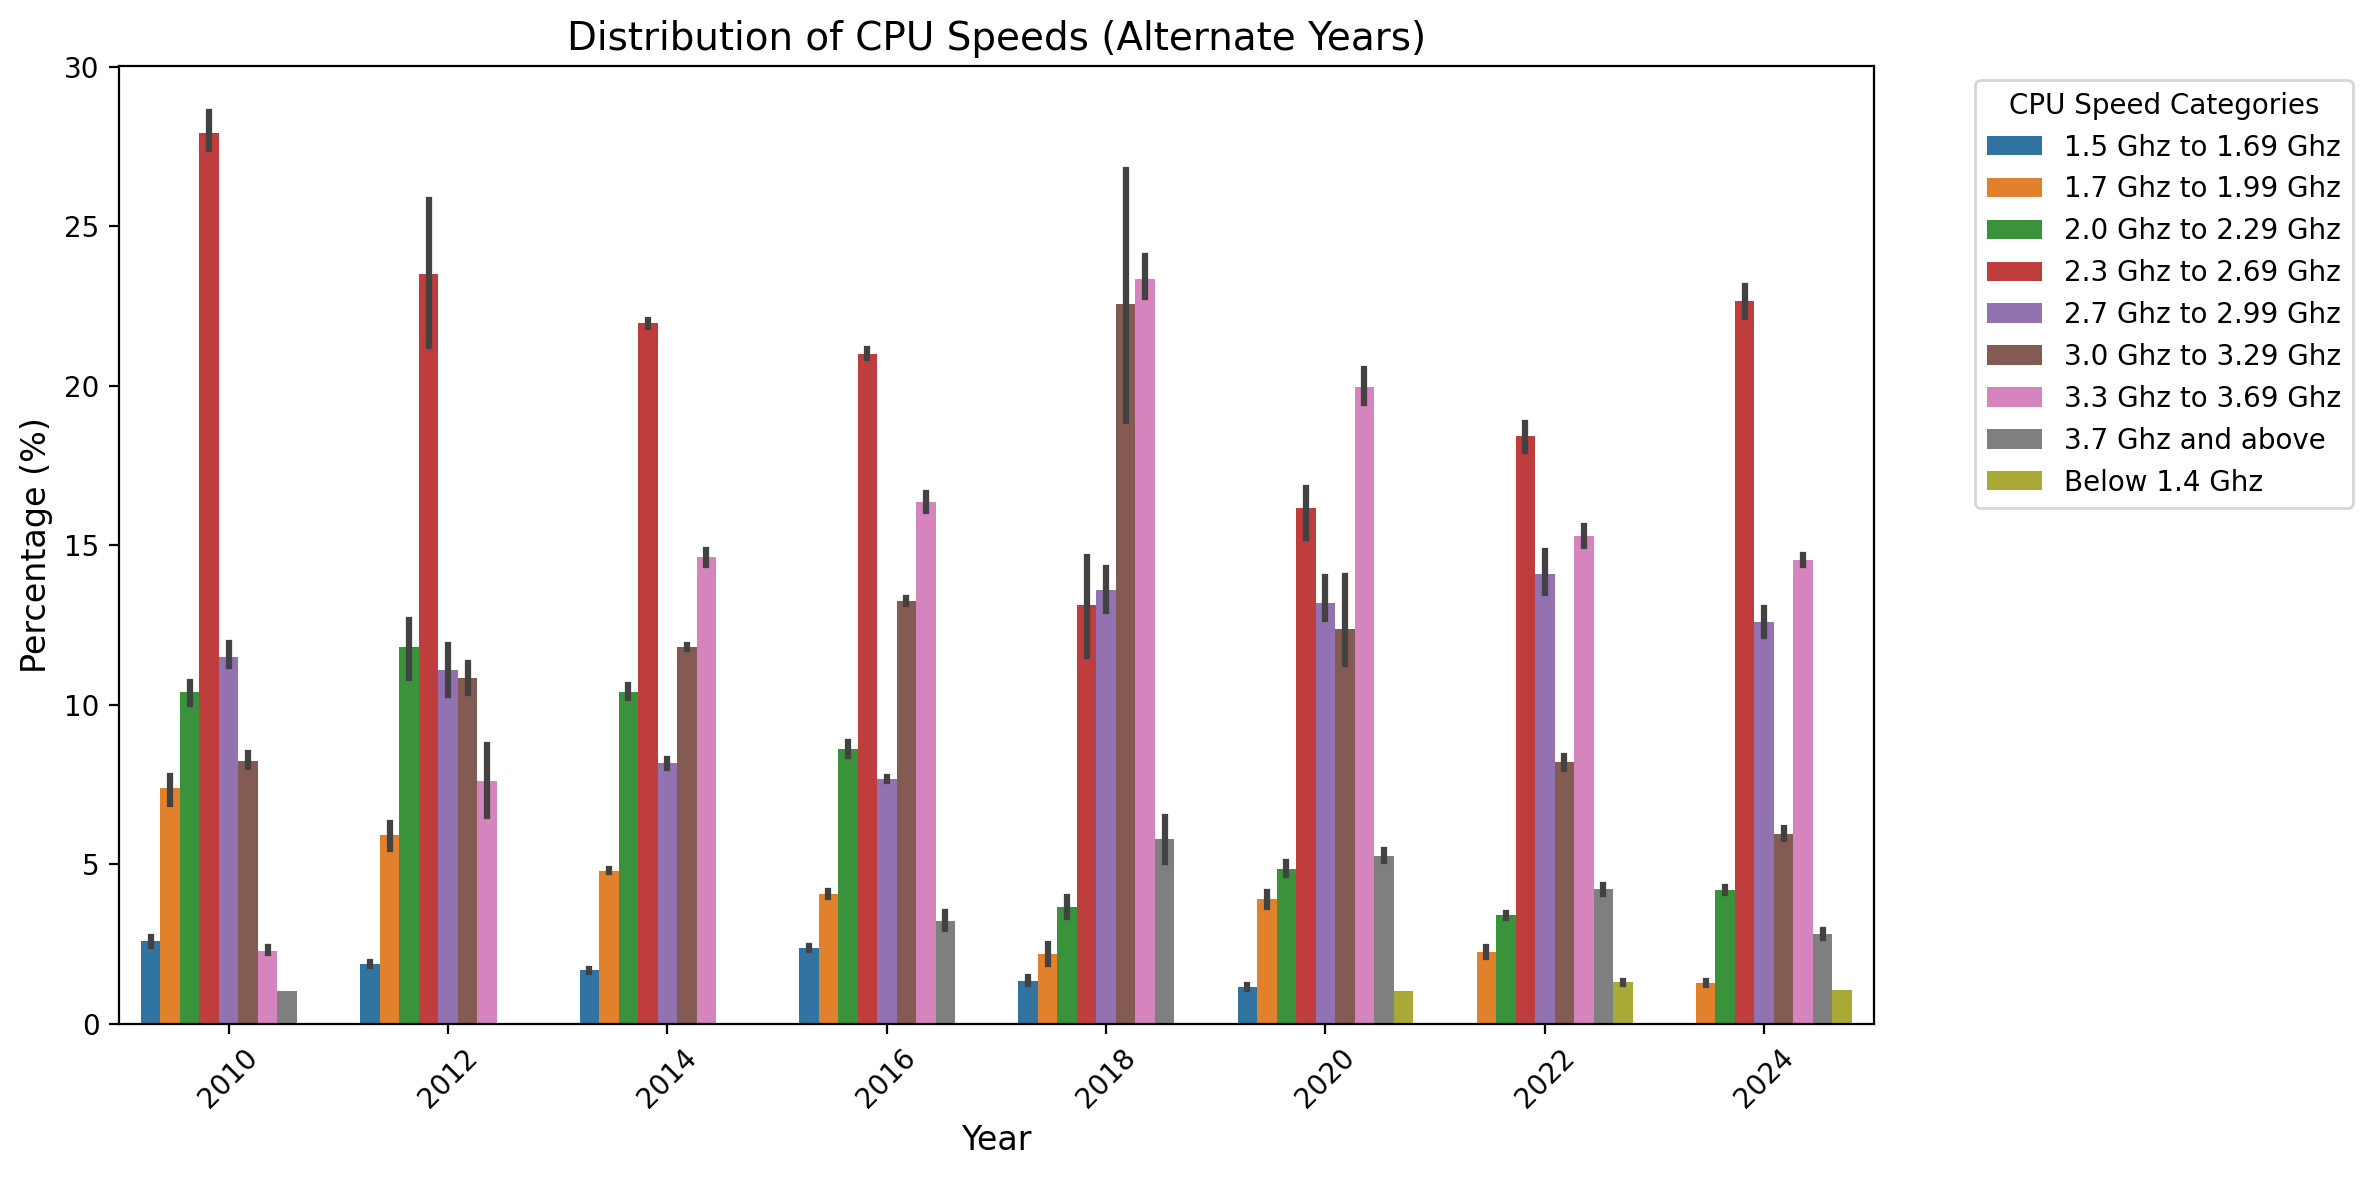

In [37]:
df_processor_speed = df.loc[
    (df["category"] == "Intel CPU Speeds") &
    (df["platform"] == "combined") &
    (df["perc"] > 1)
].copy()

df_processor_speed["year"] = df_processor_speed["date"].dt.year  # Convert to integer for filtering

# Filter for alternate years
alternate_years = df_processor_speed["year"].unique()[::2]  # Select every second year
df_processor_speed = df_processor_speed[df_processor_speed["year"].isin(alternate_years)]
df_processor_speed["year"] = df_processor_speed["year"].astype(str)  # Convert back to string for plotting

# Create the plot
plt.figure(figsize=(12, 6))
sns.barplot(
    data=df_processor_speed,
    x="year",
    y="perc",
    hue="index",  # Assuming "index" represents CPU speed categories
    palette="tab10"
)
plt.title("Distribution of CPU Speeds (Alternate Years)", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Percentage (%)", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="CPU Speed Categories", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

The bar chart titled "Distribution of CPU Speeds (Alternate Years)" illustrates the percentage distribution of CPUs across various speed categories from 2010 to 2024, focusing on alternate years. It provides insights into the evolution of CPU speed preferences and technological advancements over time.

From the chart, a clear trend emerges where mid-range CPU speeds (e.g., 2.3 GHz to 2.99 GHz) have consistently held a significant share, particularly from 2014 onwards, reflecting their popularity for general-purpose computing. In earlier years, there was a more balanced distribution across lower-speed CPUs, such as those in the 1.7 GHz to 1.99 GHz range, indicating earlier hardware limitations or a broader range of older machines in use.

As technology advanced, higher-speed CPUs, especially those in the 3.0 GHz to 3.69 GHz and above categories, gained prominence, particularly after 2018. This shift aligns with the increasing demand for more powerful processors due to advancements in gaming, professional applications, and data-intensive workloads.

Conversely, the share of CPUs below 1.4 GHz and those in the 1.5 GHz to 1.69 GHz range has steadily declined, almost vanishing by 2024, signaling the phasing out of older or less capable processors. This reflects a general industry trend toward higher baseline performance in consumer and enterprise markets.

In summary, the chart highlights a gradual shift toward higher-speed CPUs, driven by advancements in technology and changing performance requirements, while lower-speed CPUs have become obsolete over time.